In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Define paths
data_path = 'Data'
predictions_csv = 'fullyr_future_stock_predictions.csv'
visualization_path = 'Visualization'

# Create the Visualization folder if it doesn't exist
if not os.path.exists(visualization_path):
    os.makedirs(visualization_path)

# Load our predictions
stock_predictions_df = pd.read_csv(predictions_csv, parse_dates=['Date'])

# Groupby stock
grouped_predictions_df = stock_predictions_df.groupby('Stock')

In [3]:
# Create plot_stock, a function that plots historical and prediction data
def plot_stock(stock_name, data_path, grouped_predictions_df, visualization_path):
    #Load stock data
    stock_history_file = os.path.join(data_path, stock_name + '.csv')
    stock_history_data = pd.read_csv(stock_history_file, parse_dates=['Date'])
    
    # Filter historical data to only include records the 2020s
    stock_history_data = stock_history_data[stock_history_data['Date'] >= '2020-01-01']
    
    #Filter predictions
    stock_predictions = grouped_predictions_df.get_group(stock_name)

    #Plot historical data
    plt.figure(figsize=(14, 7))
    plt.plot(stock_history_data['Date'], stock_history_data['Close'], label = 'Historical Data', color = 'blue')
    #Plot projections
    plt.plot(stock_predictions['Date'], stock_predictions['Projected_Close'], label = 'Projections', color = 'green')

    #Add title 
    plt.title(f'Stock Price Prediction for {stock_name}')
    
    #Add labels
    plt.xlabel('Date')
    plt.ylabel('Price at Close')
    plt.legend()

    # Save plot as image
    plot_file_path = os.path.join(visualization_path, f'{stock_name}_projection.png')
    plt.savefig(plot_file_path)
    
    #Plot
    plt.show()

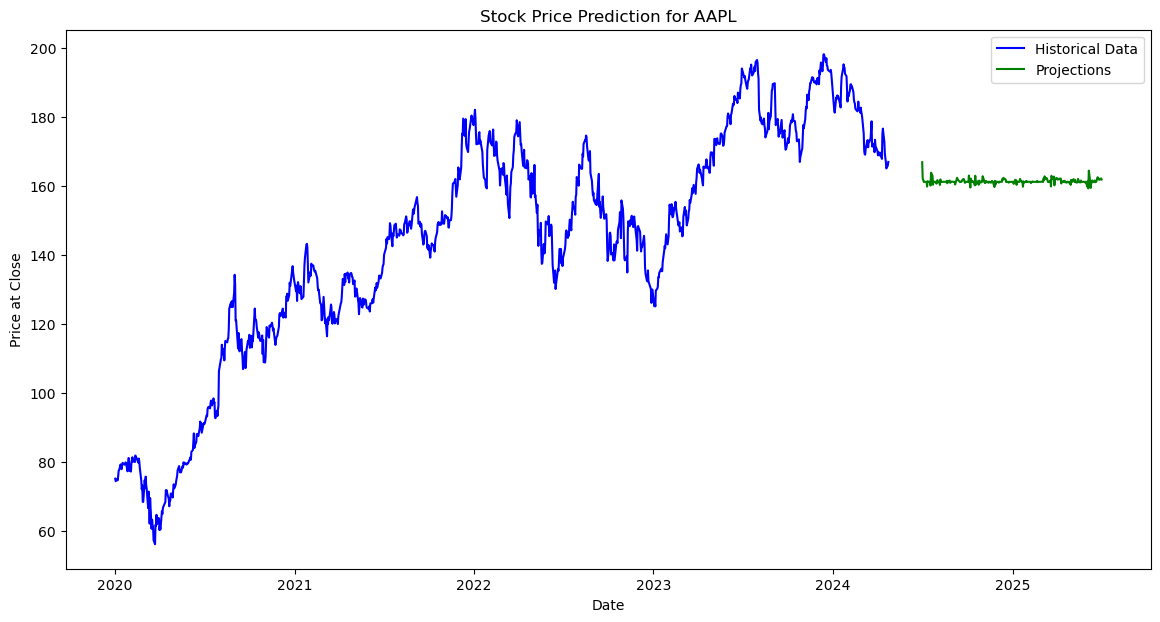

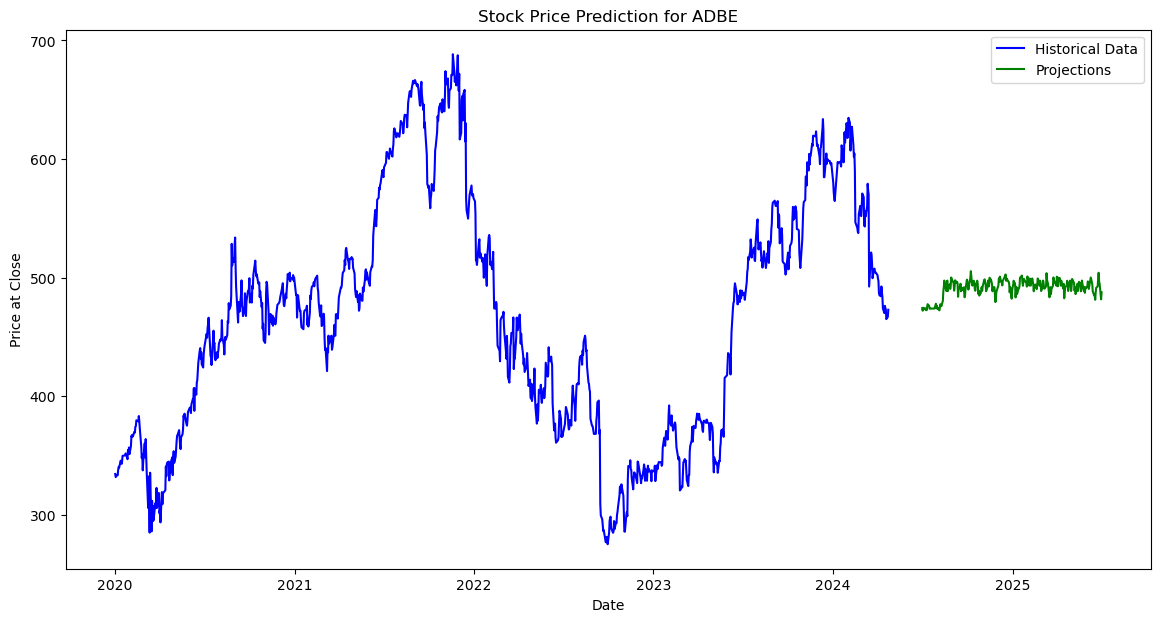

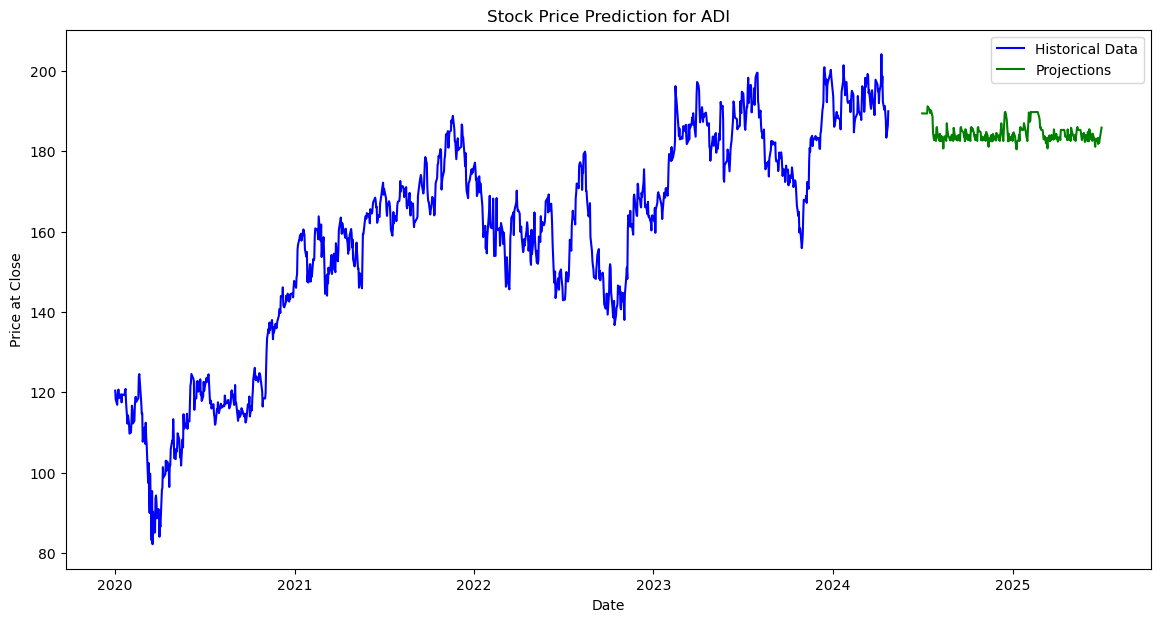

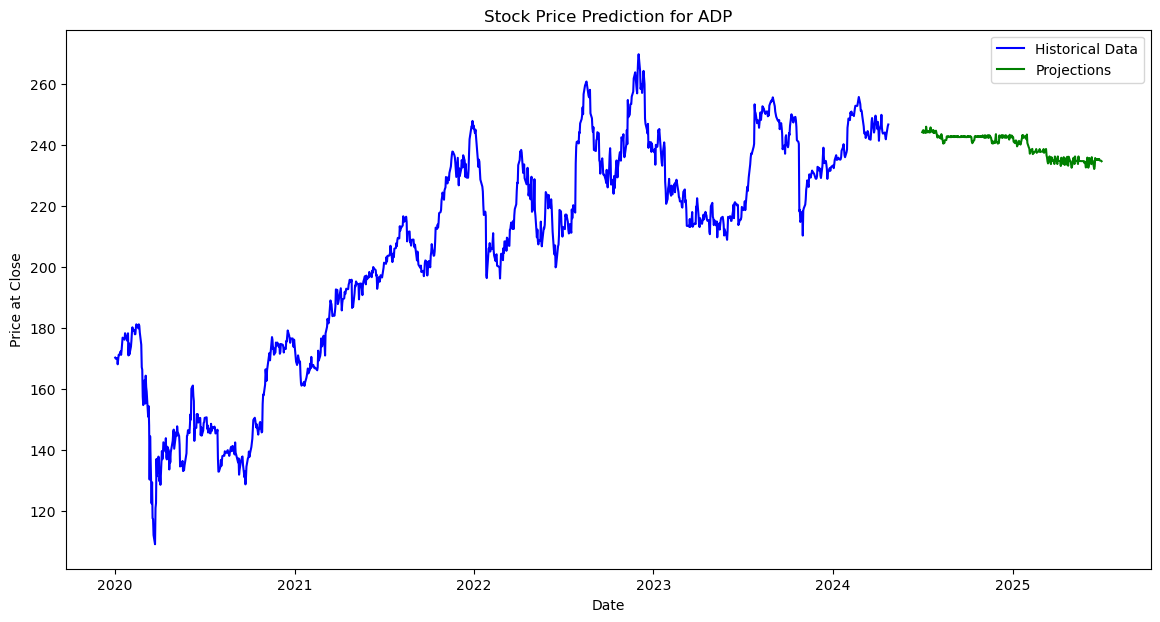

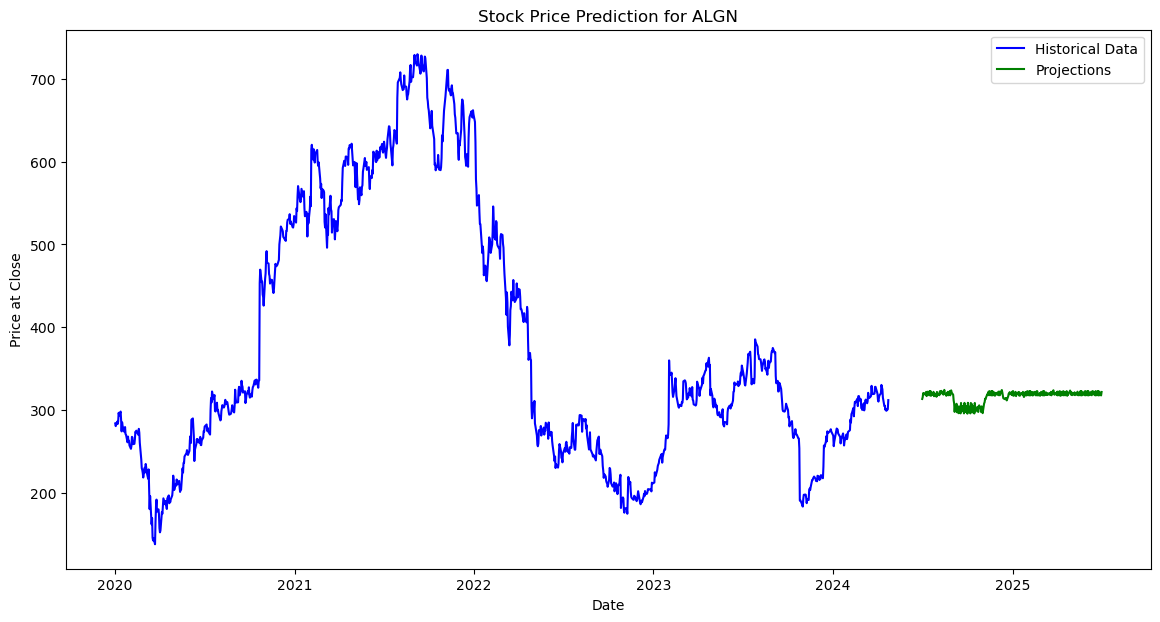

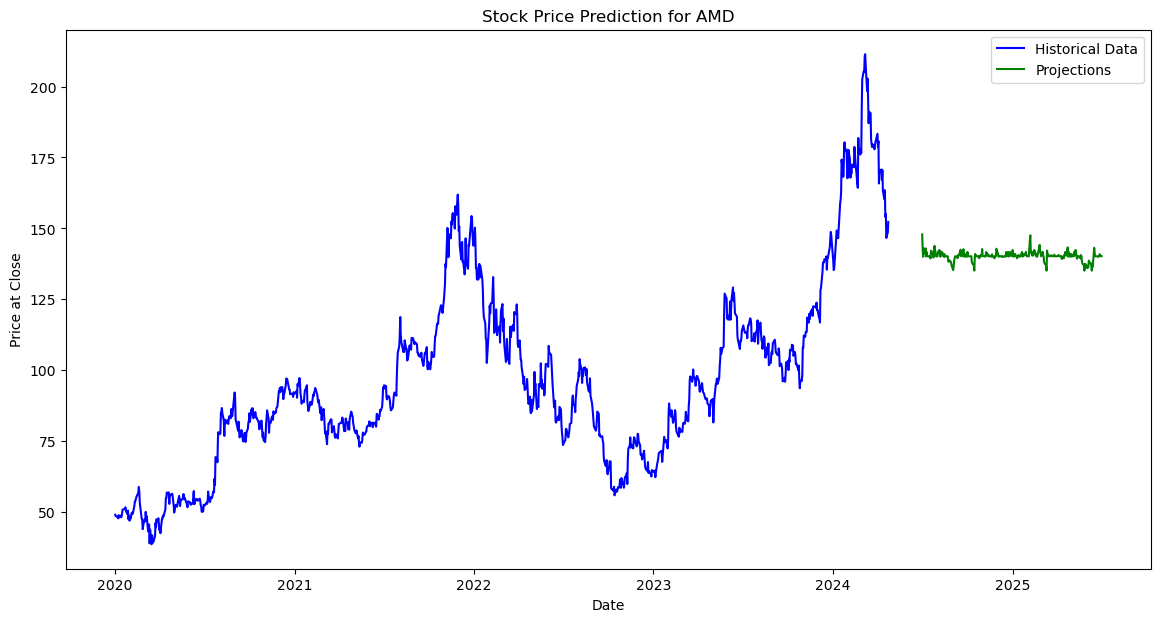

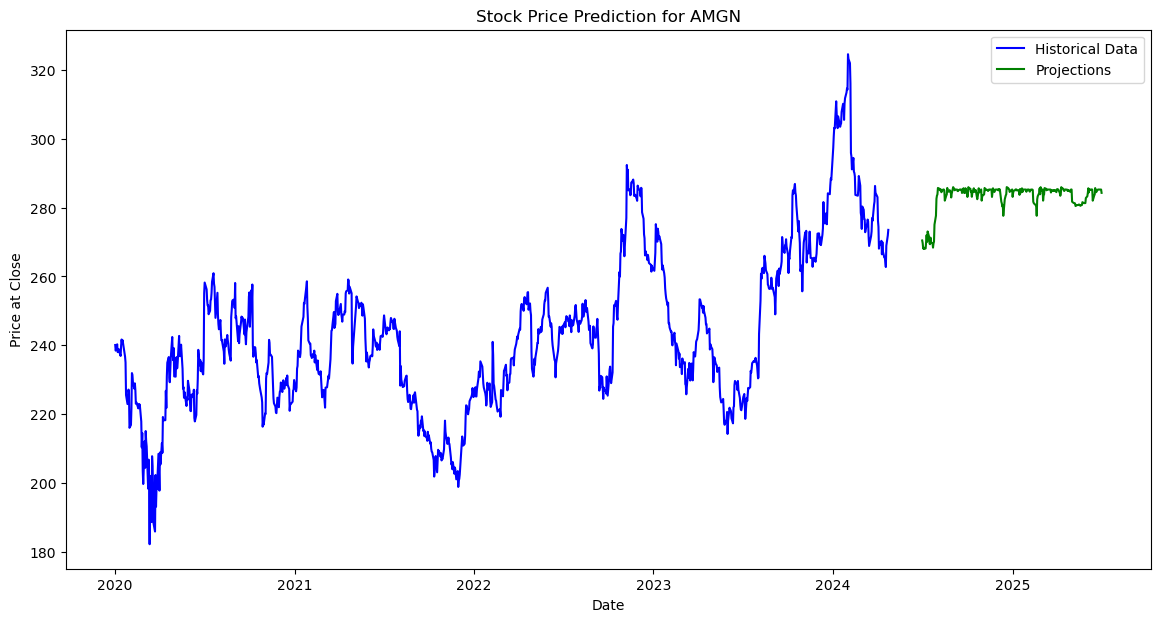

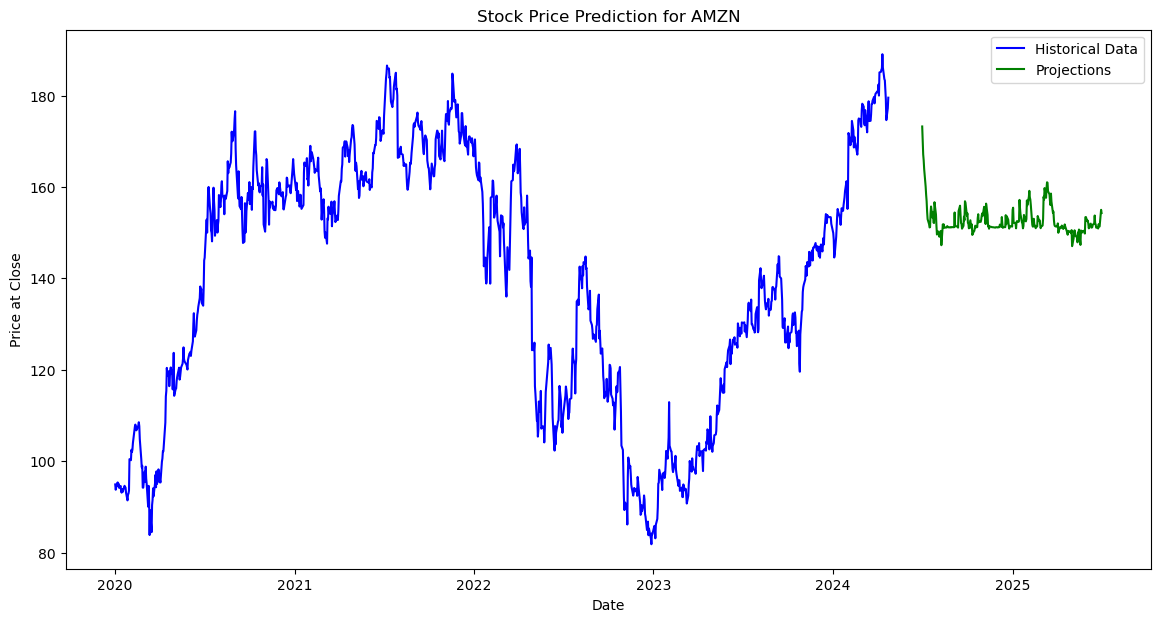

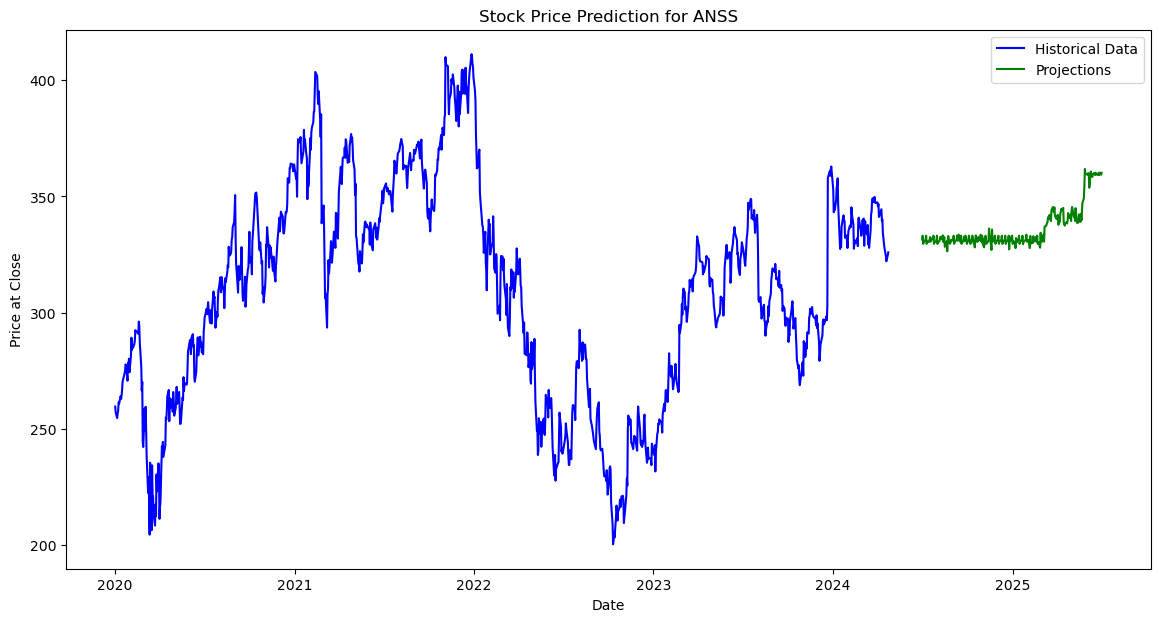

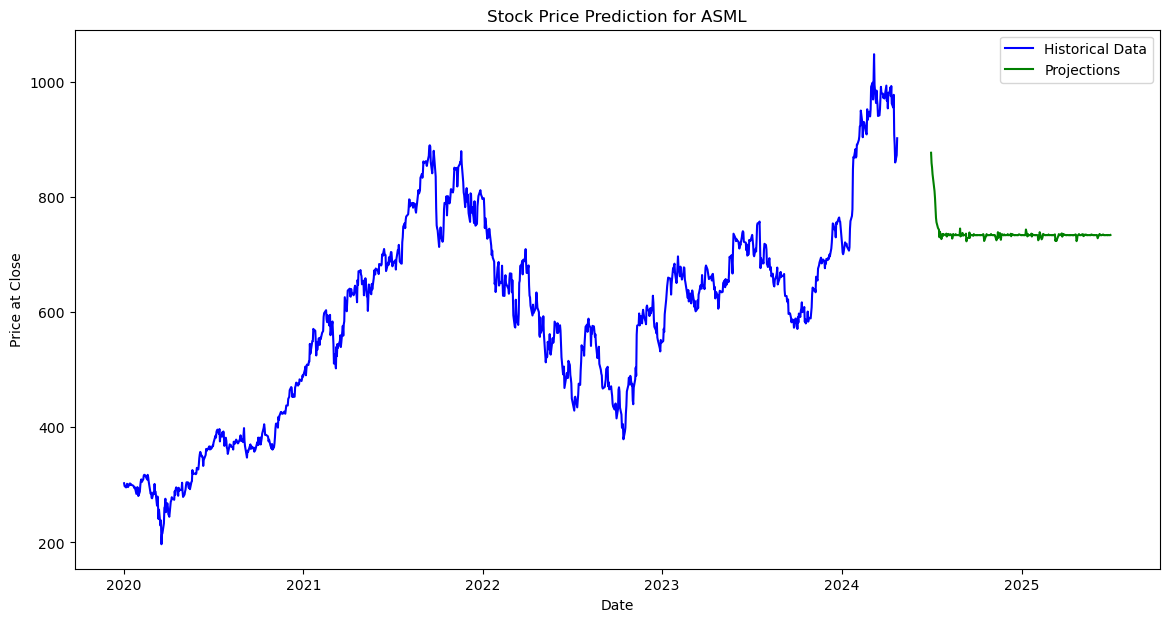

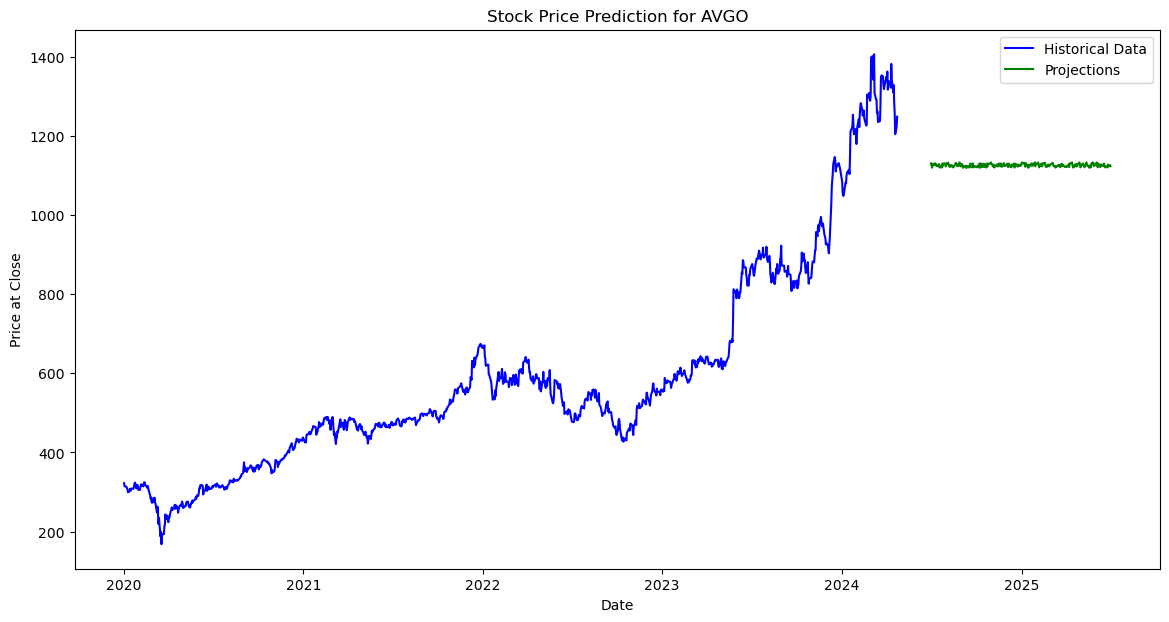

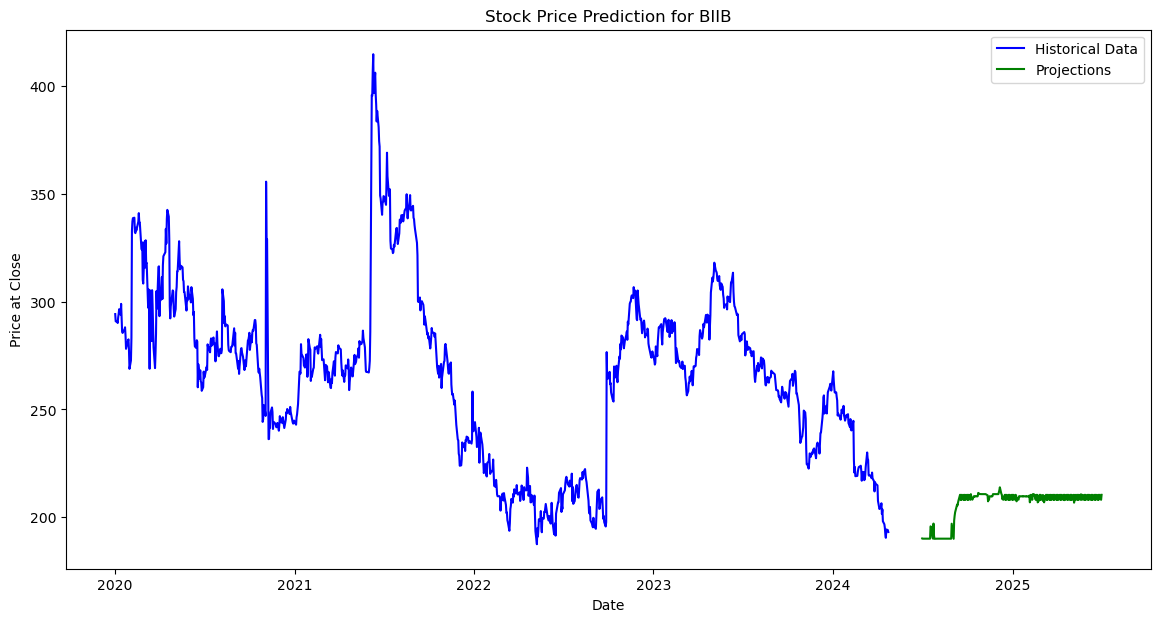

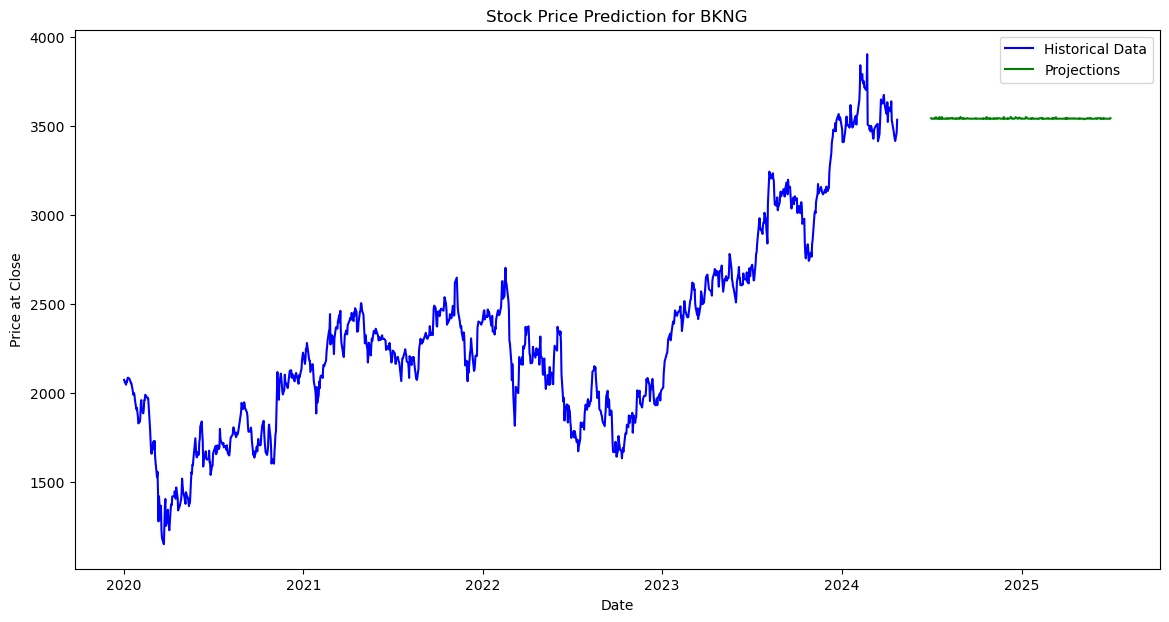

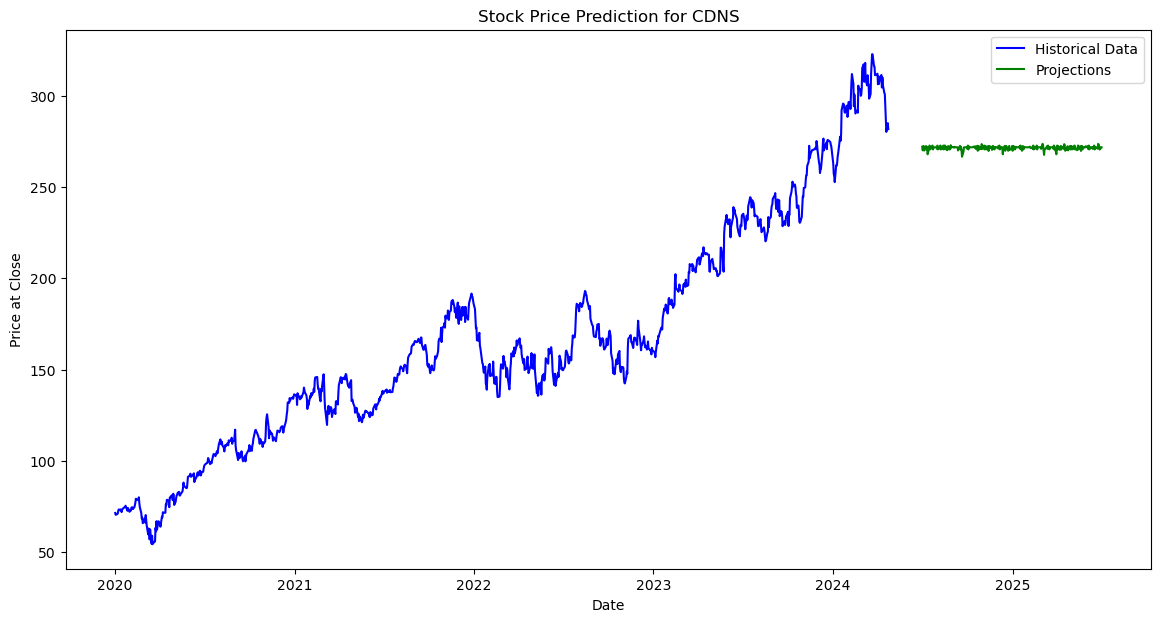

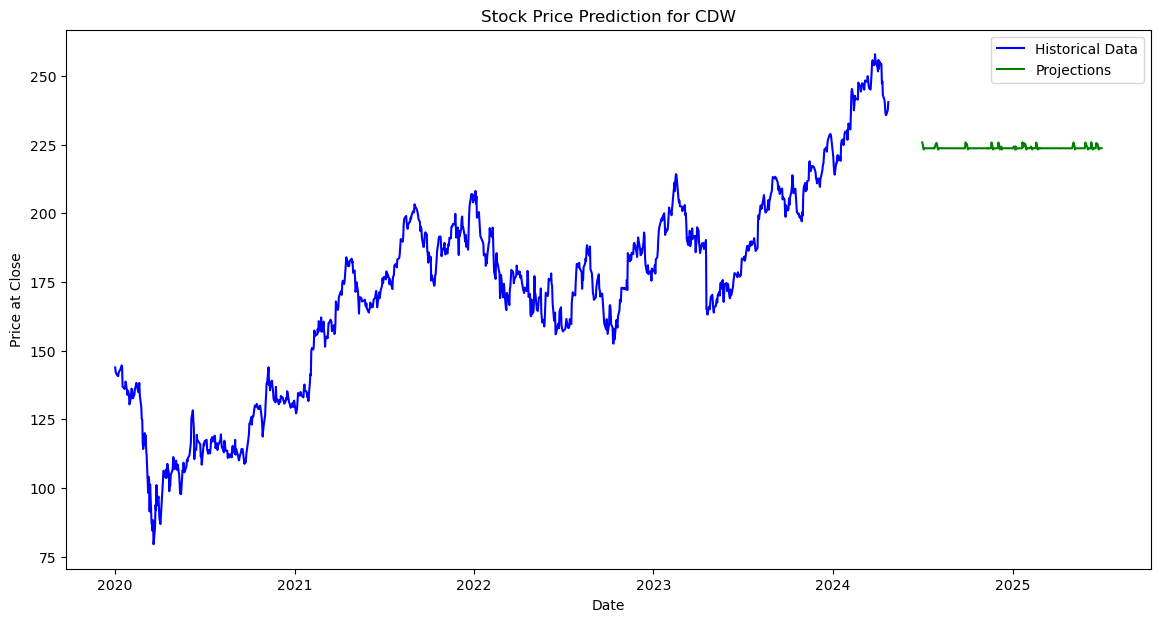

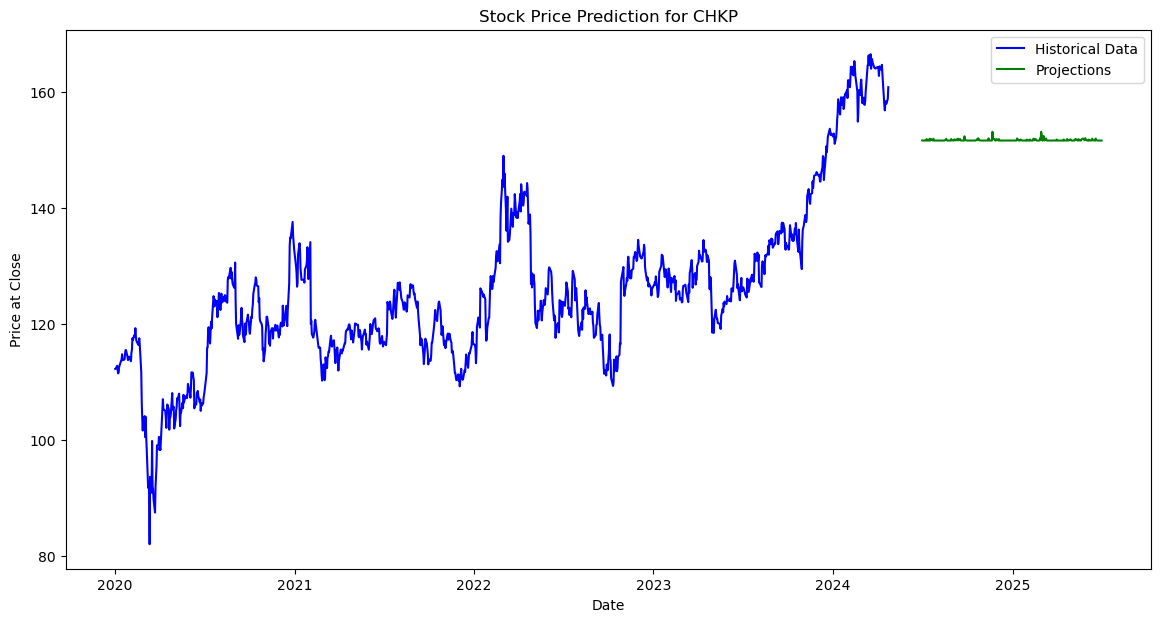

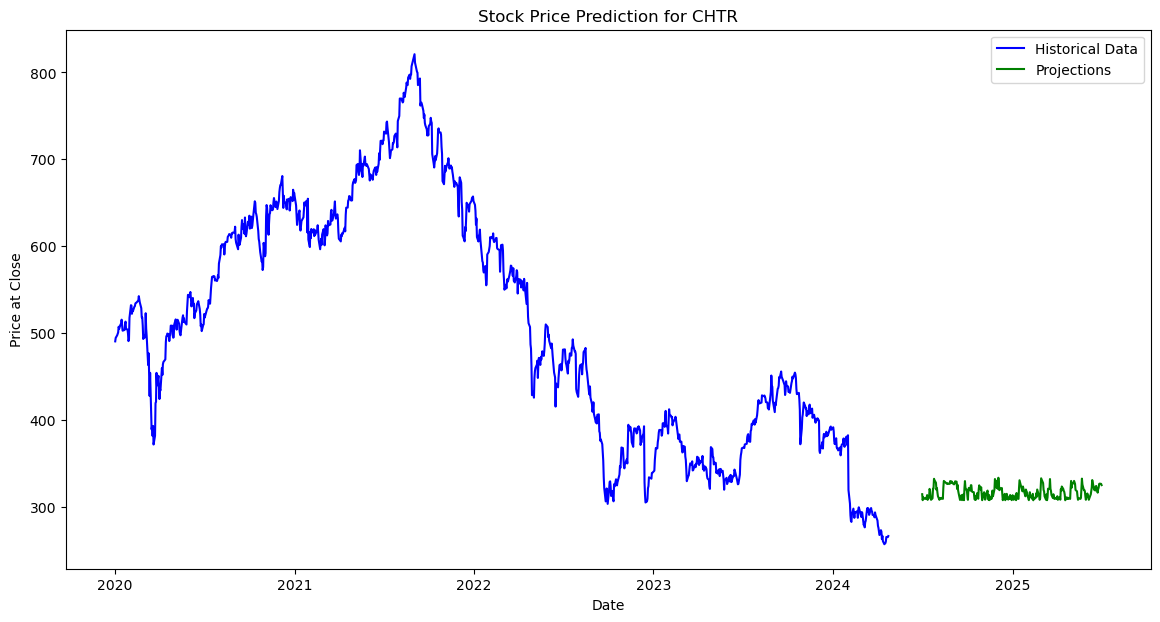

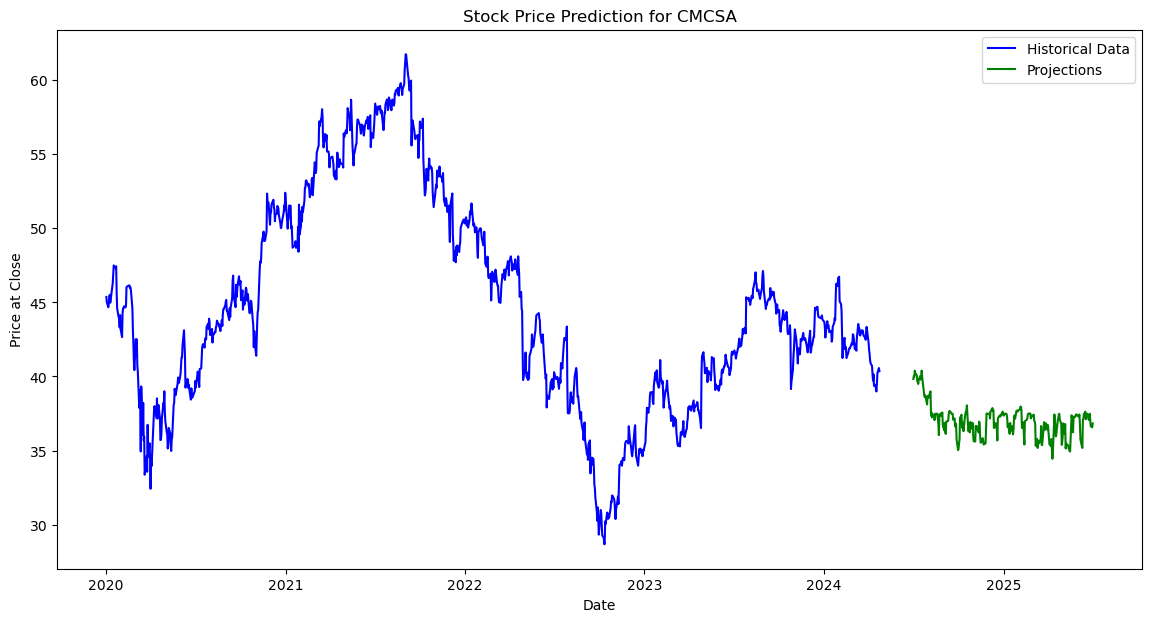

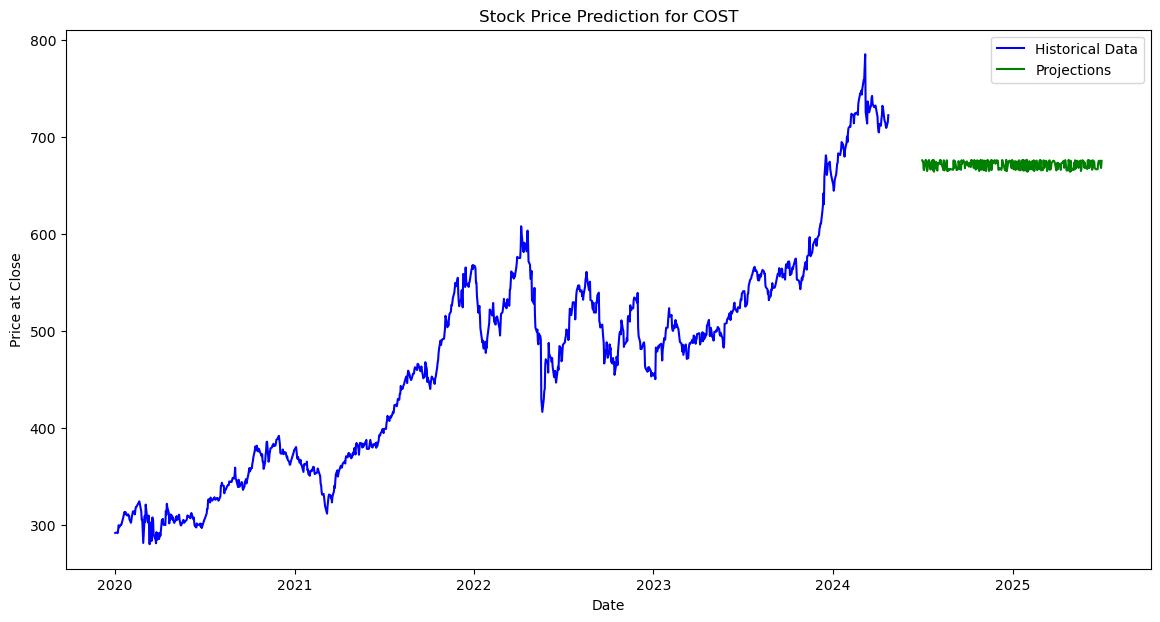

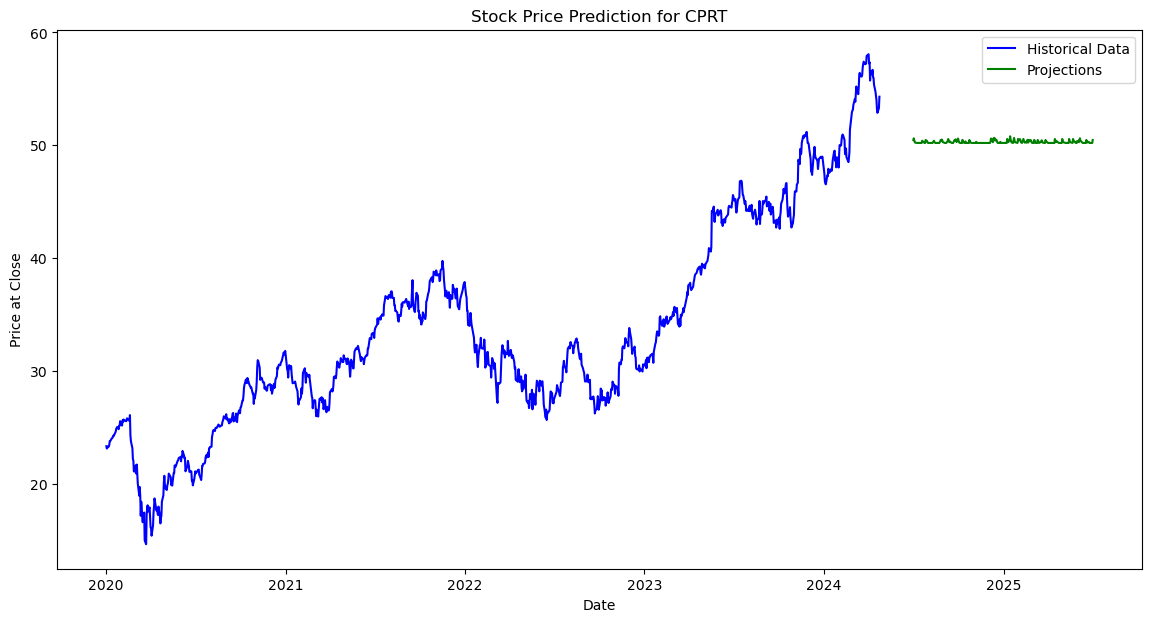

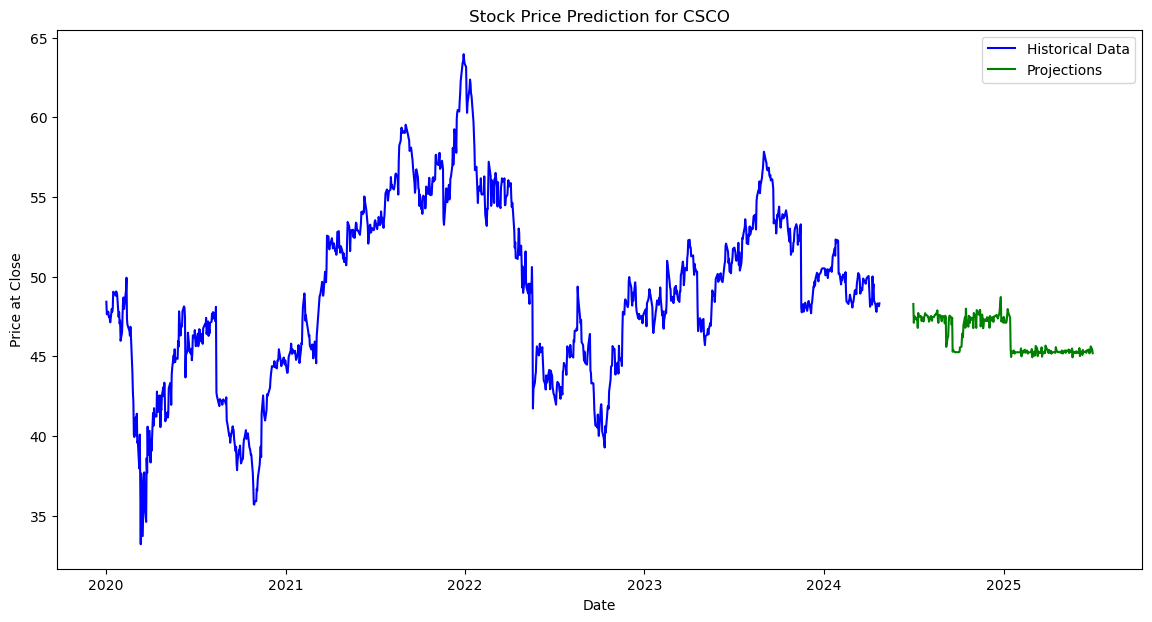

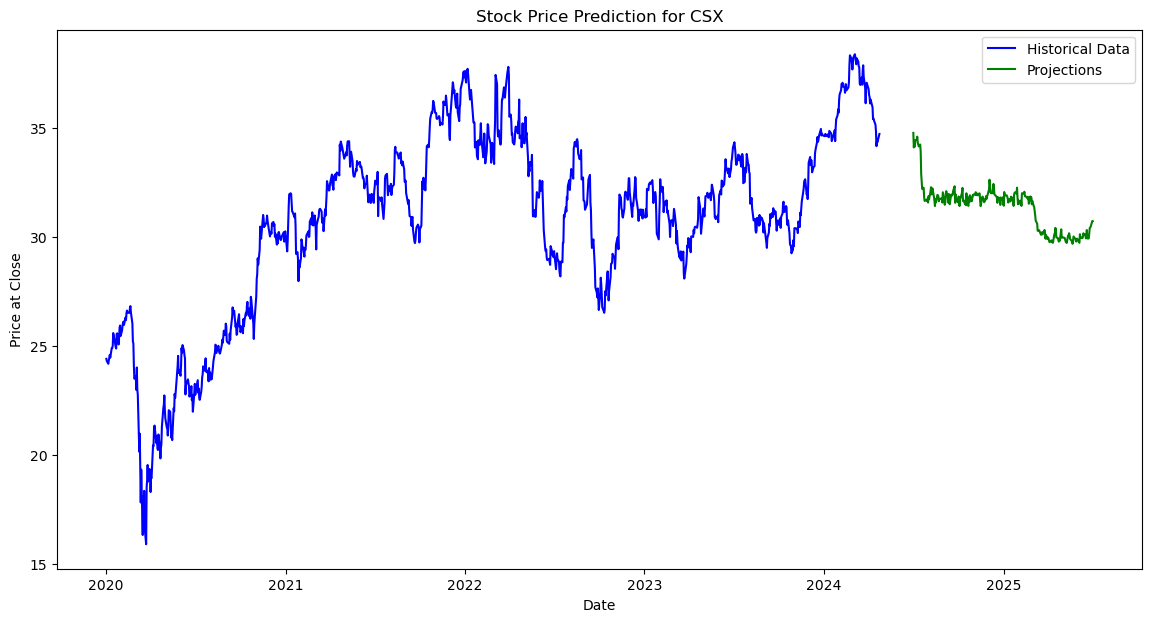

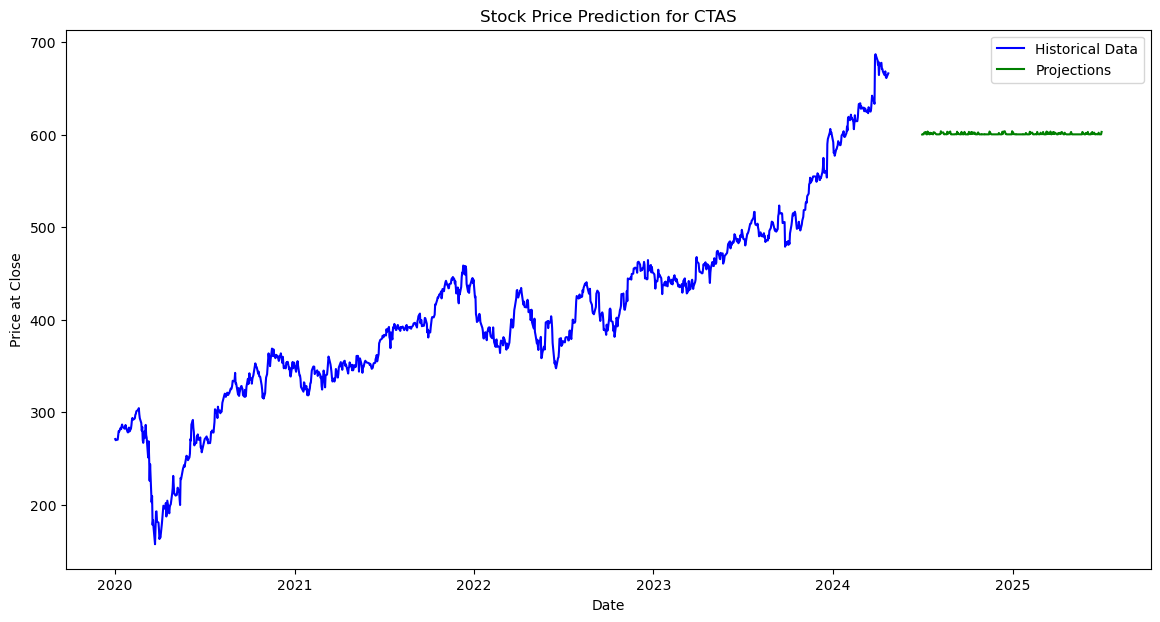

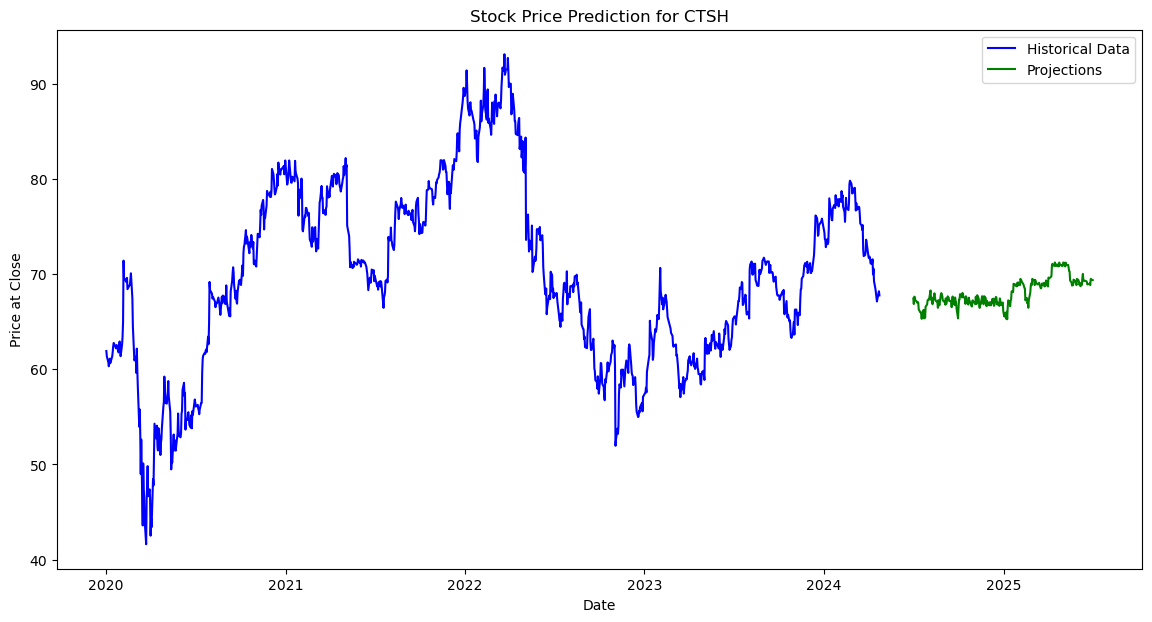

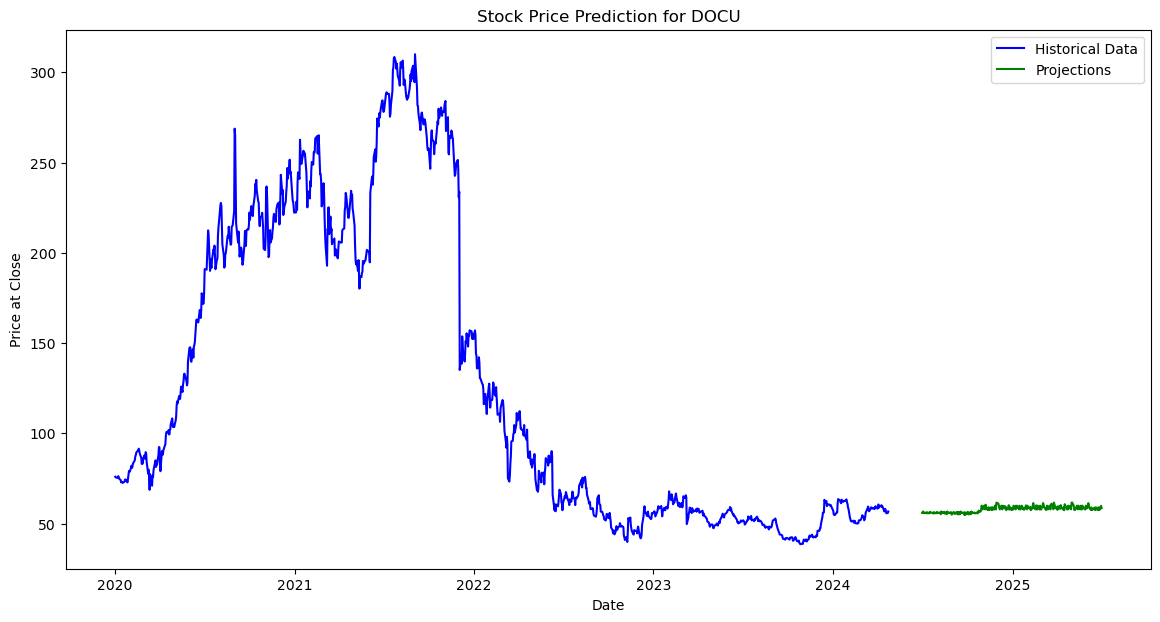

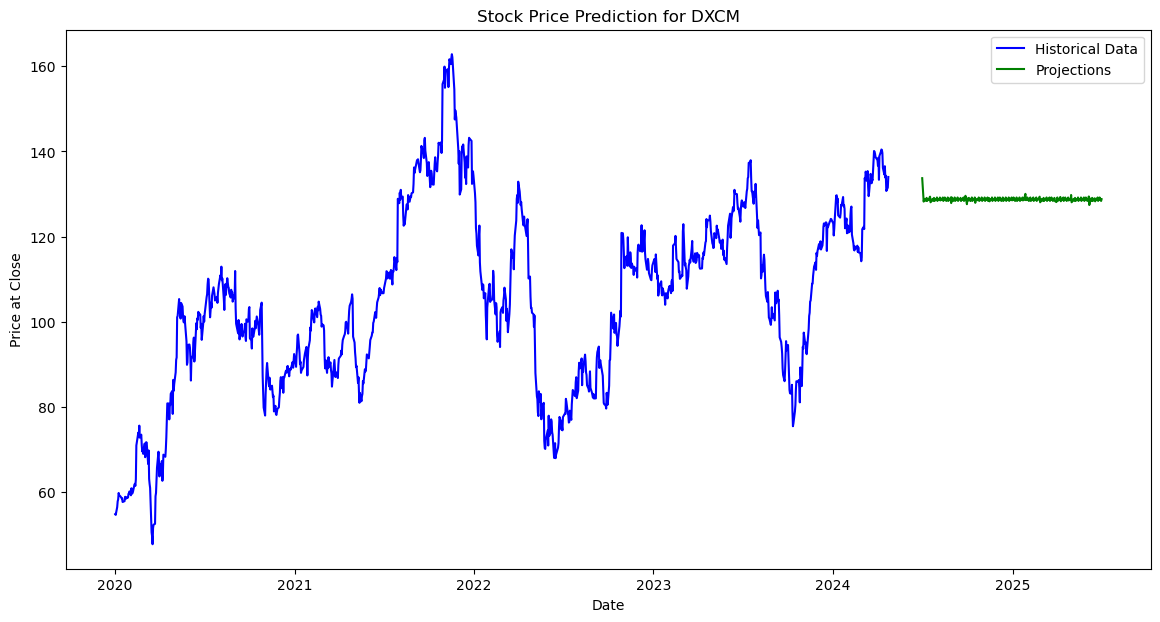

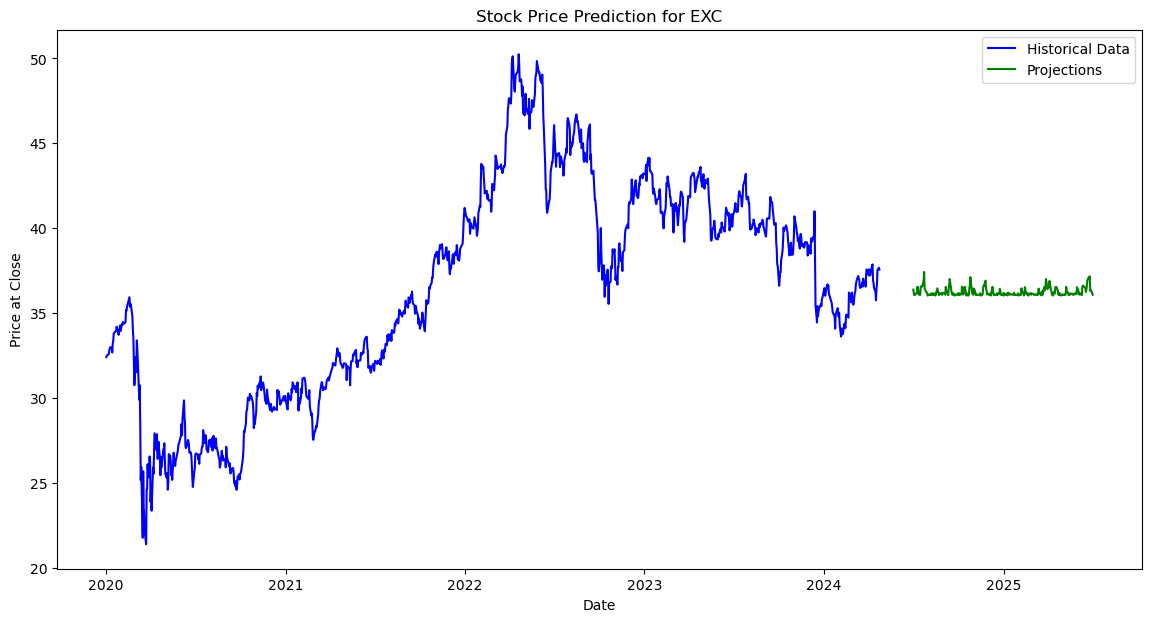

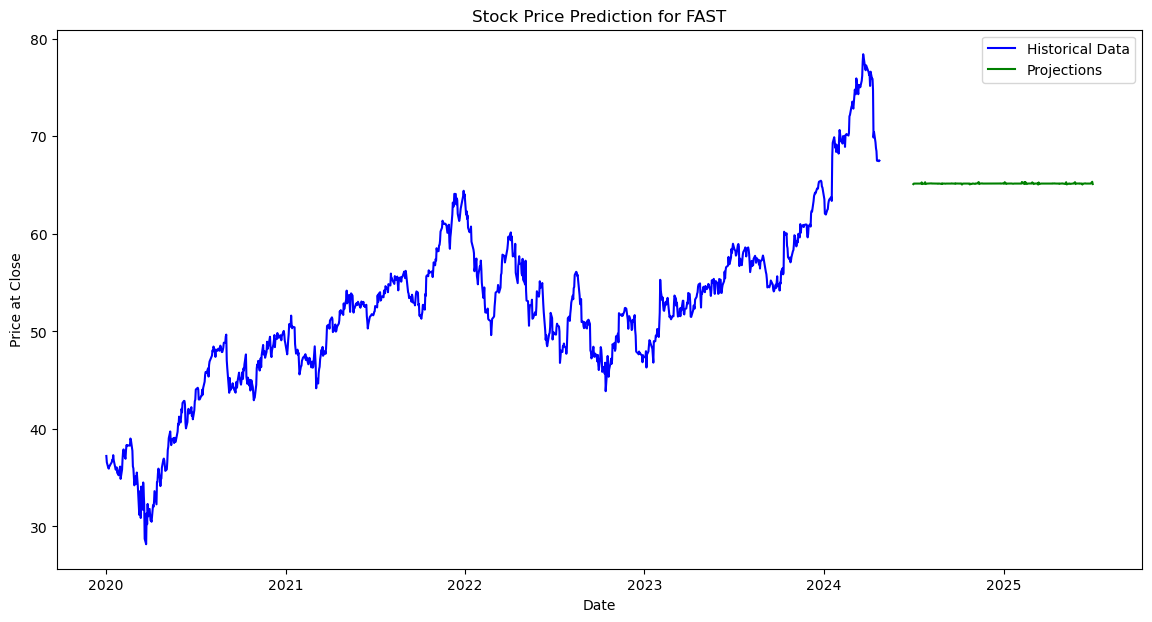

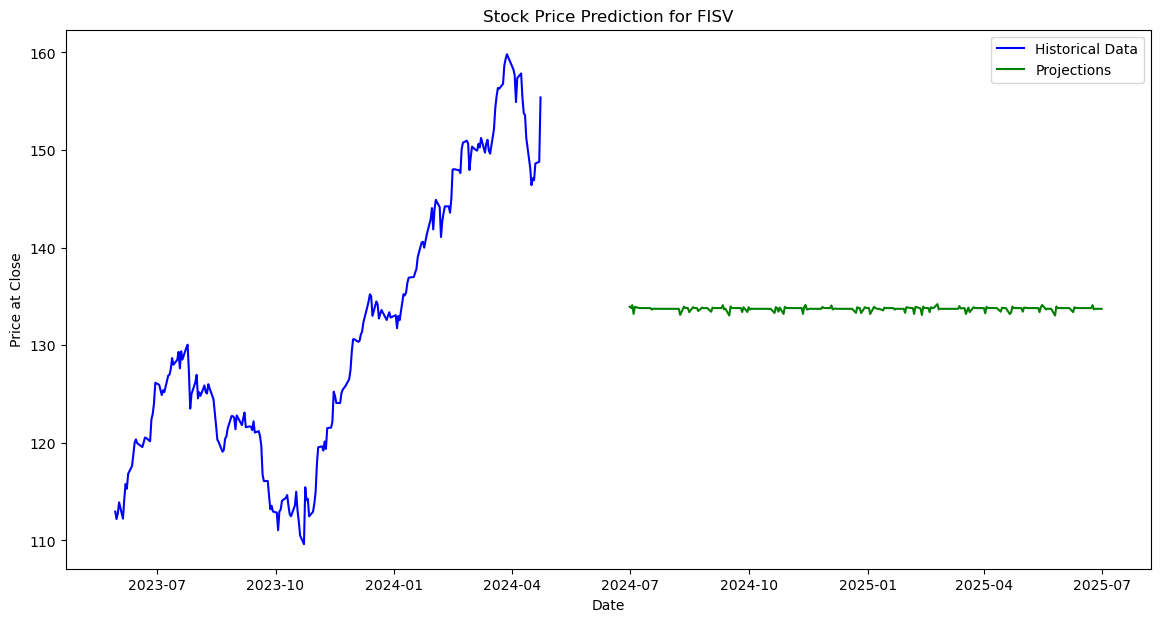

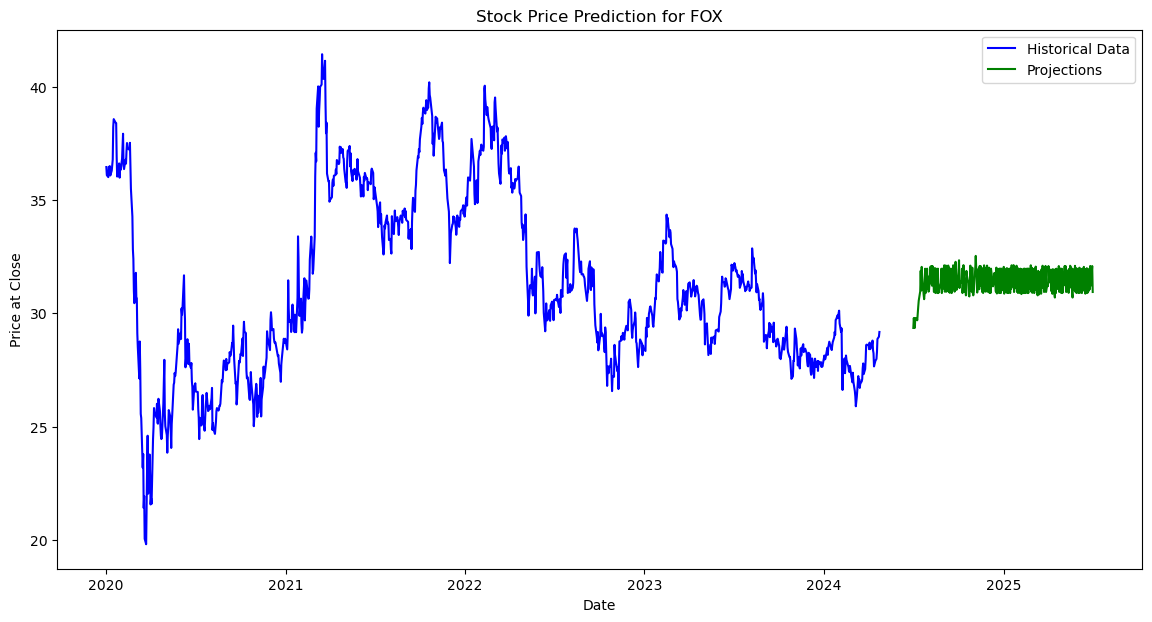

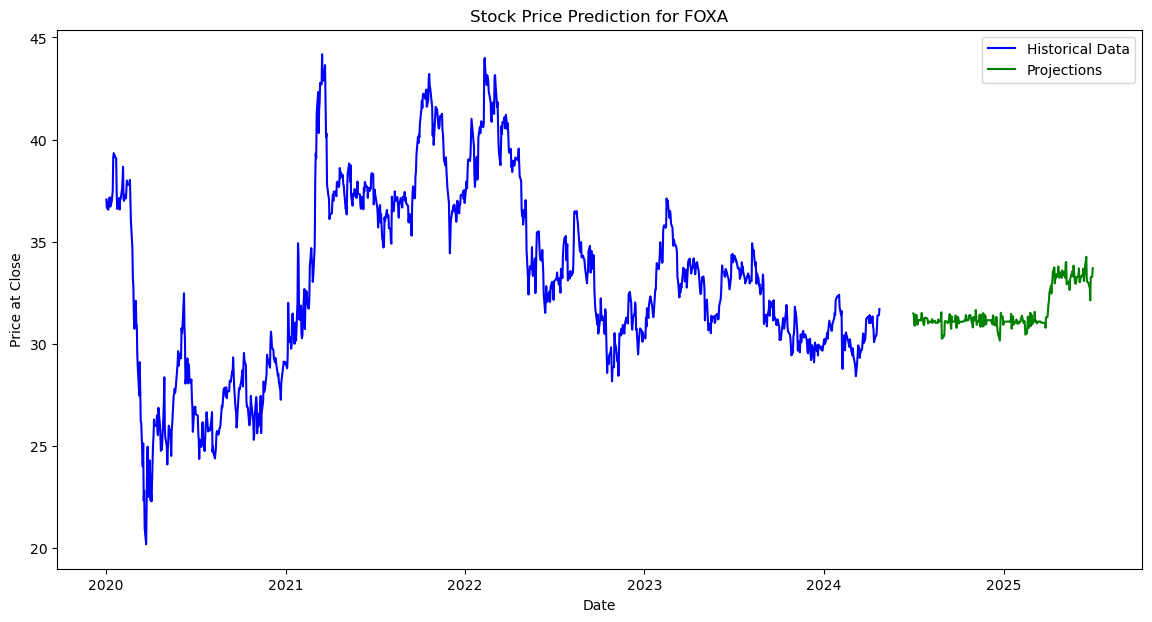

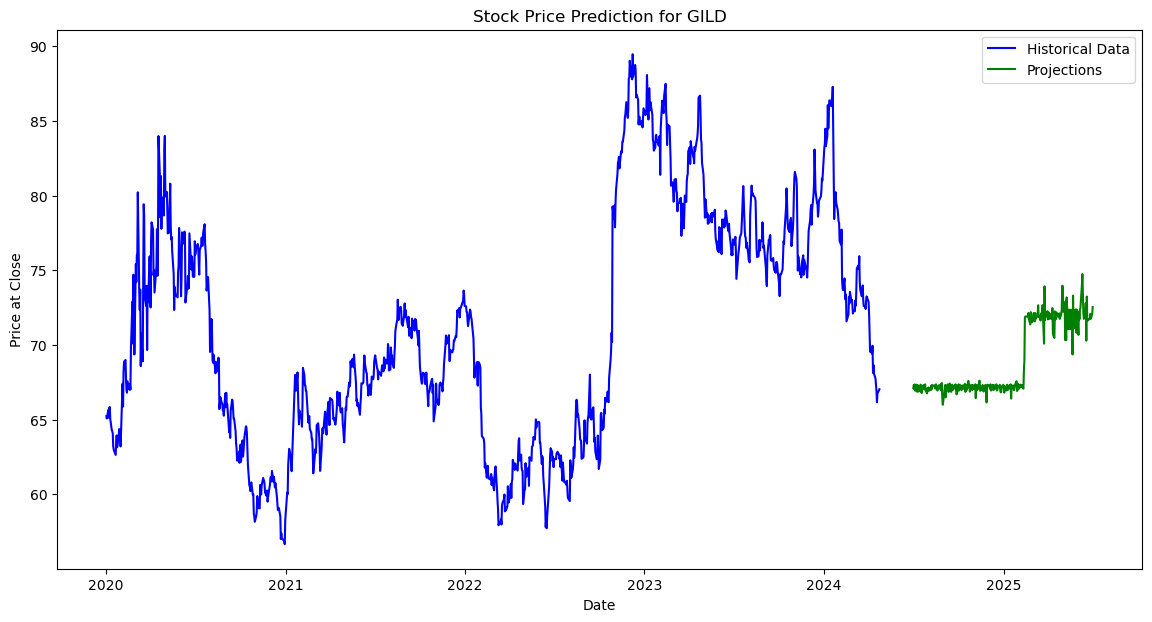

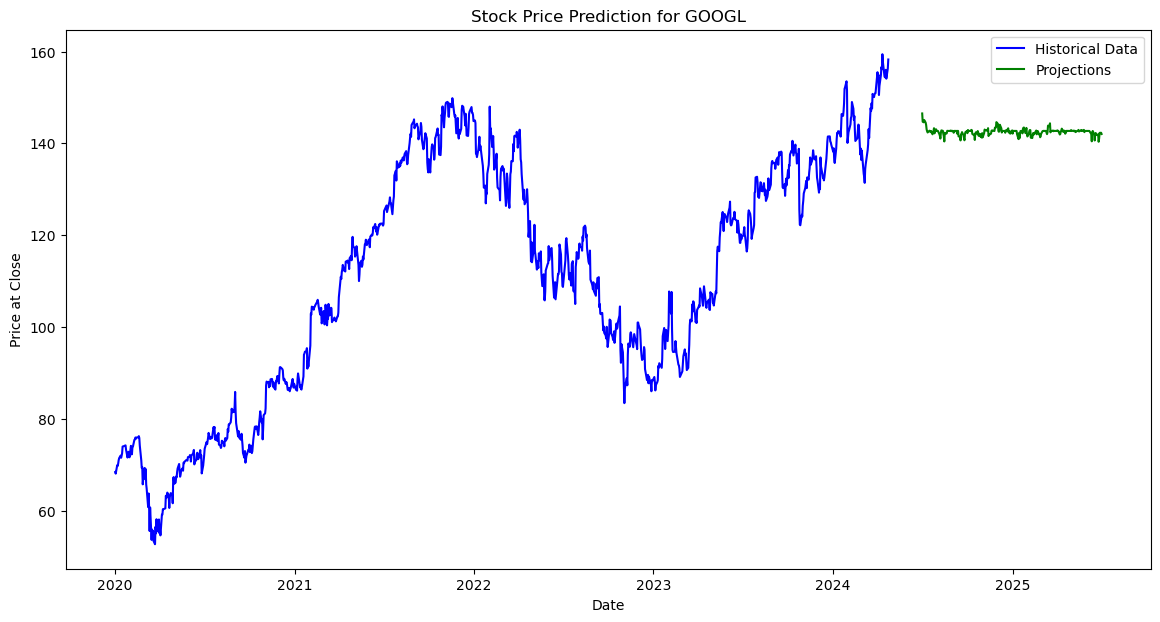

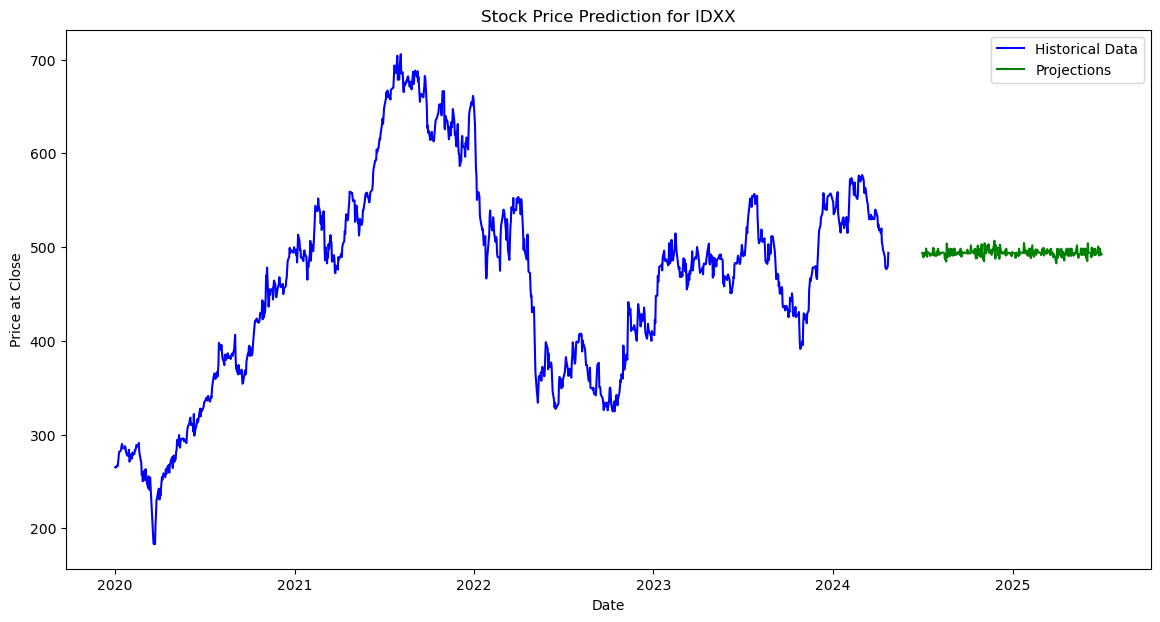

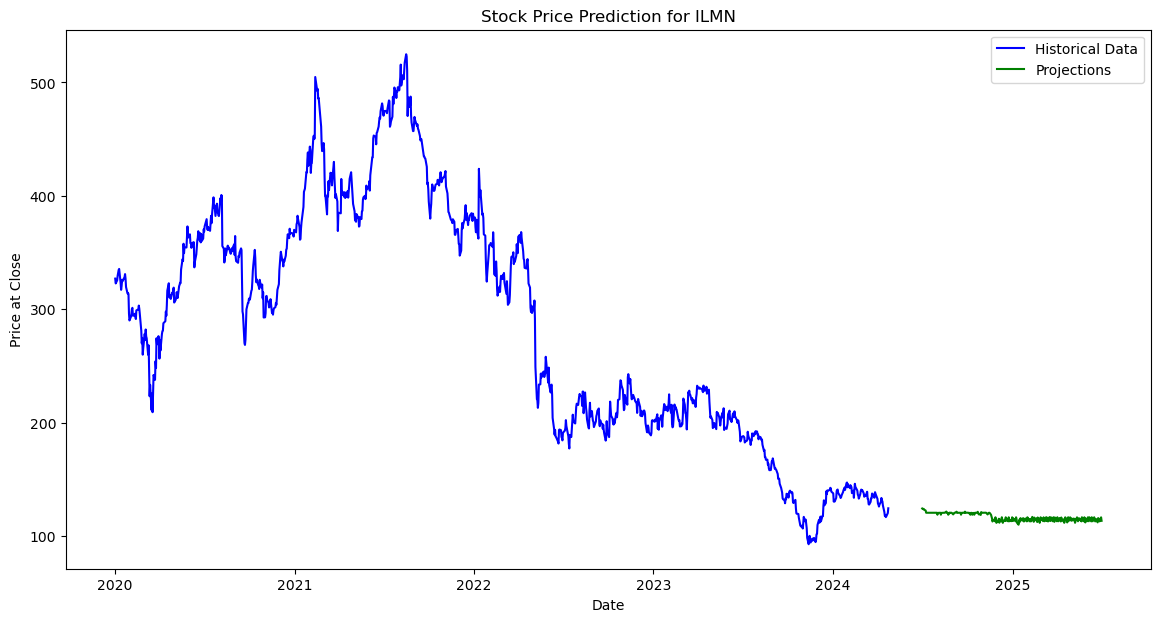

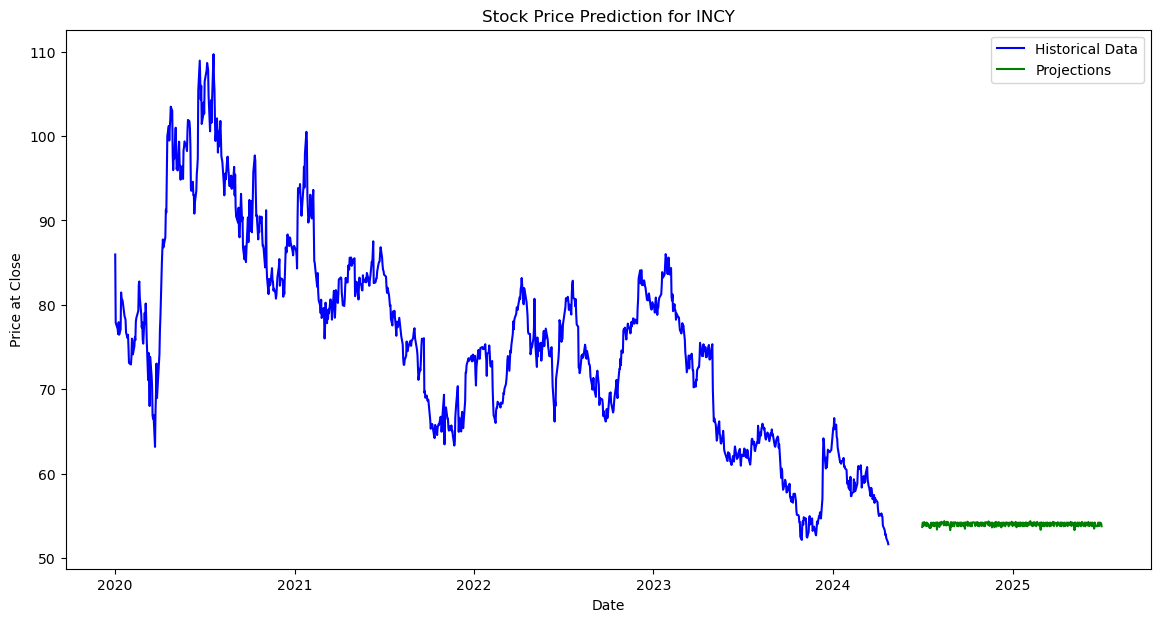

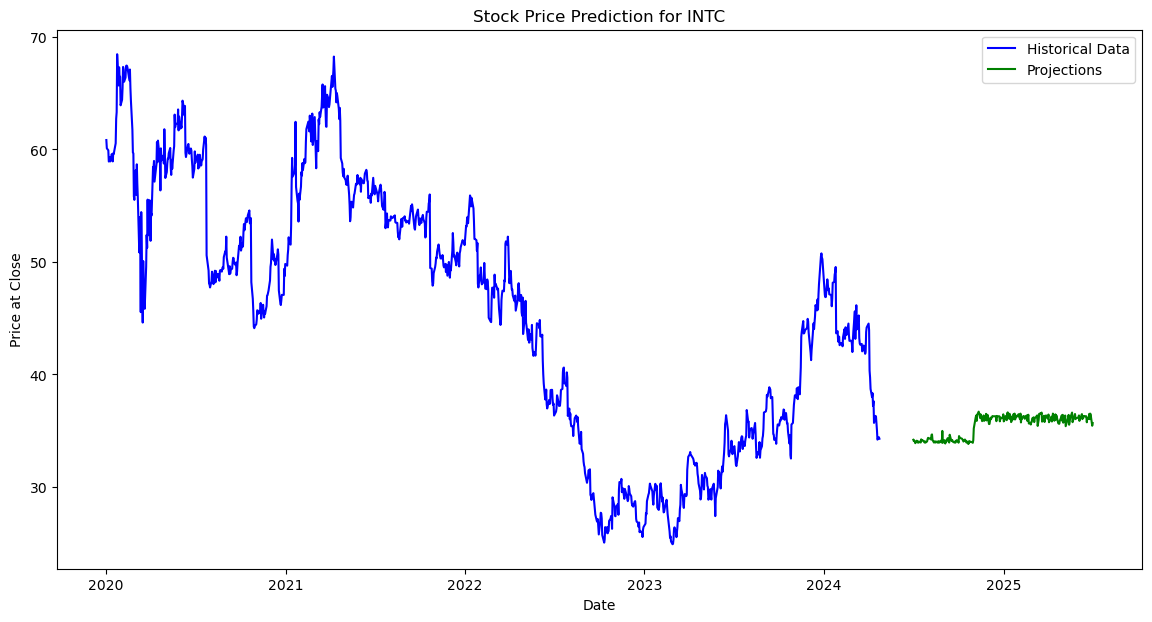

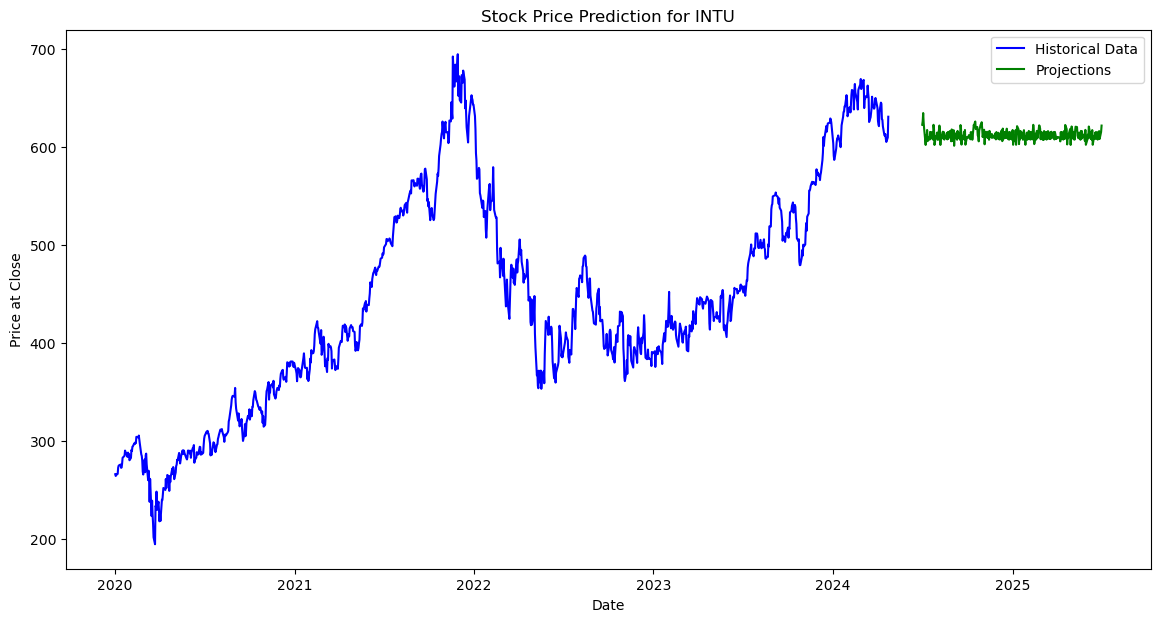

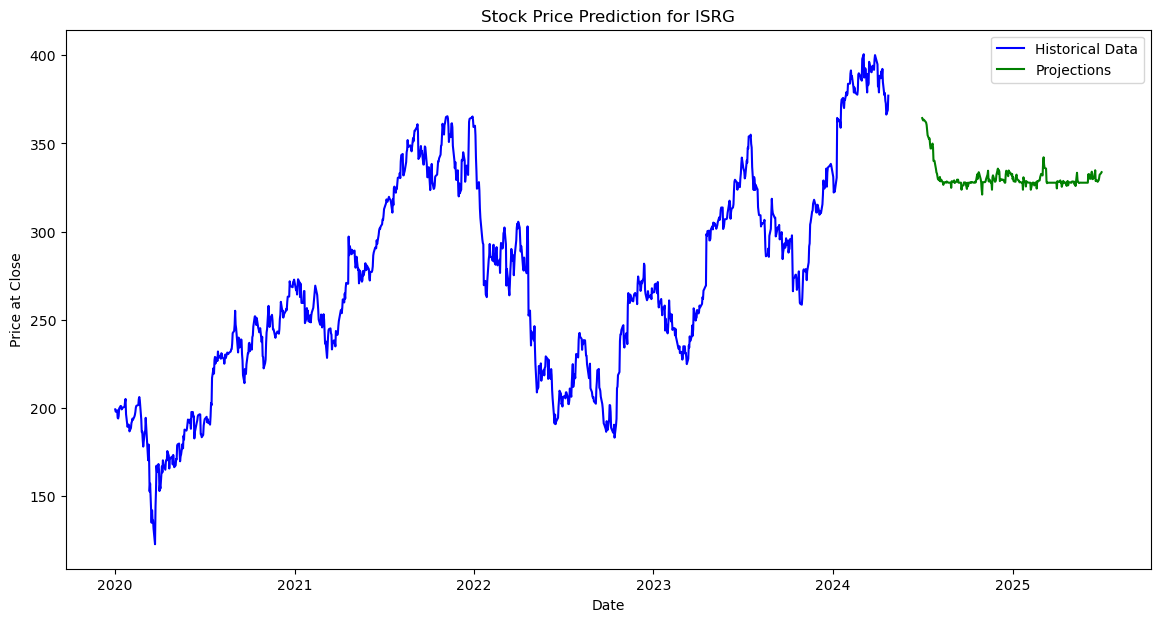

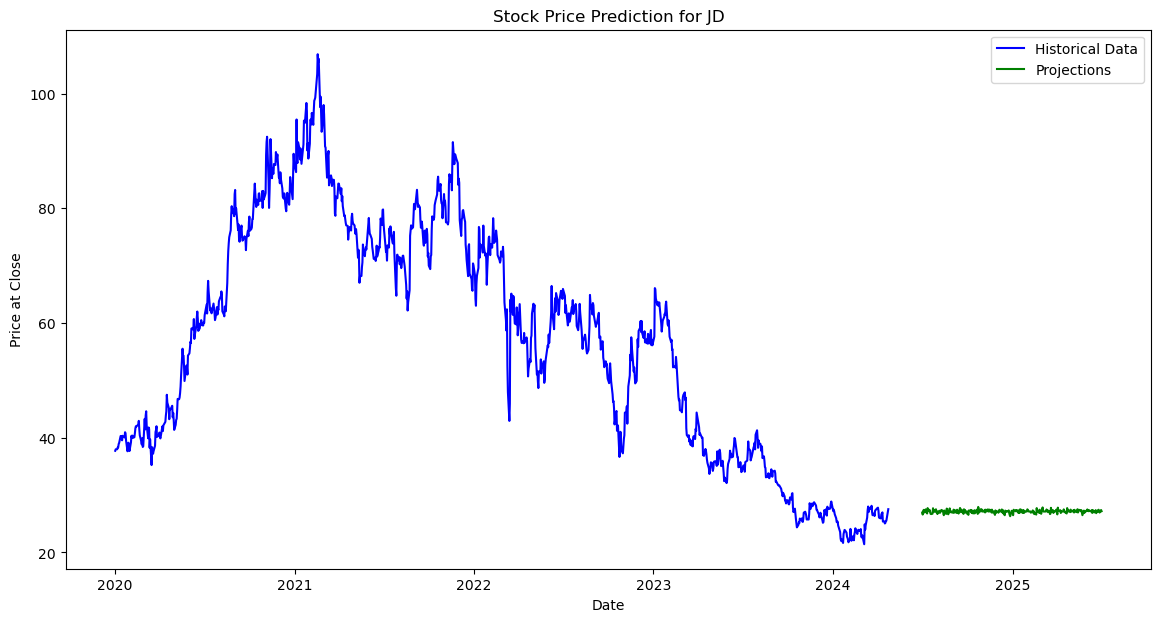

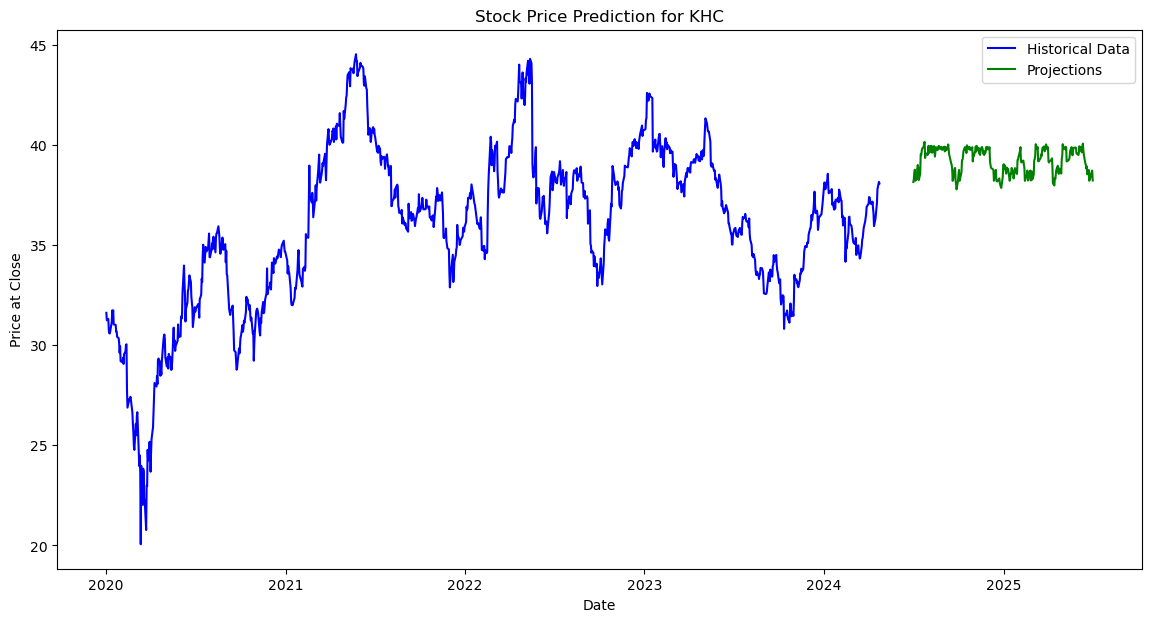

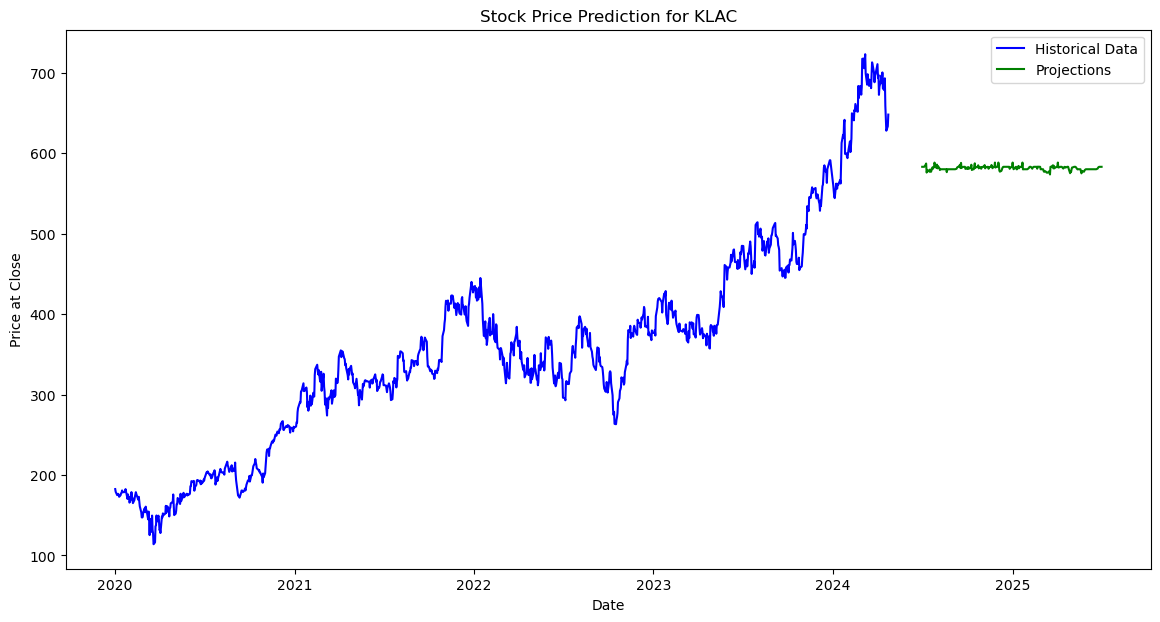

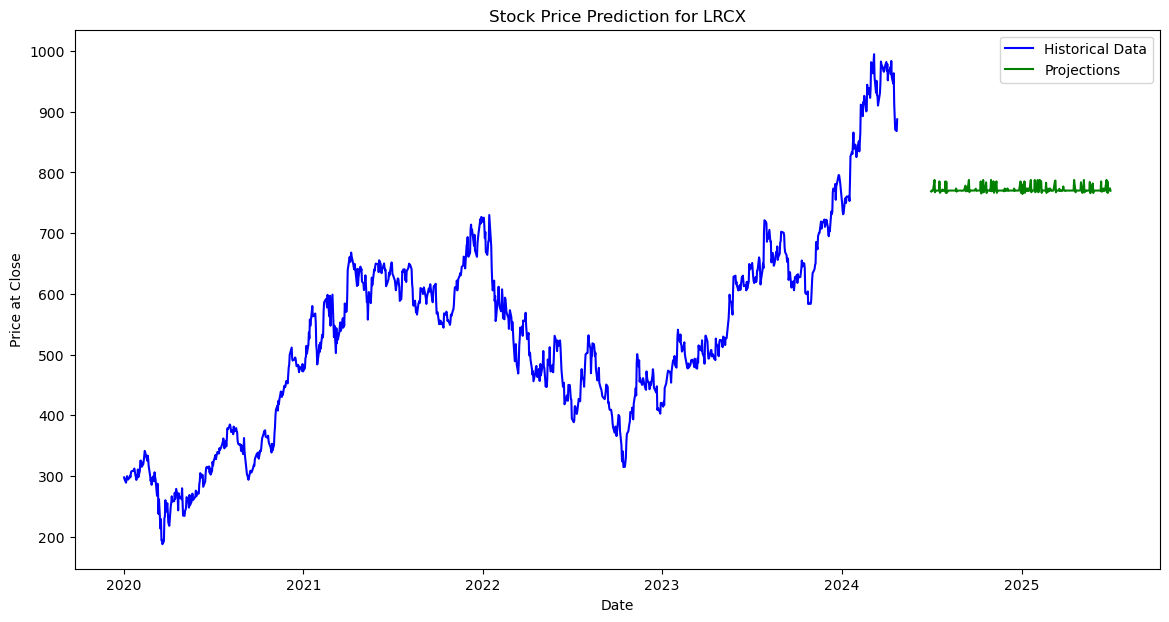

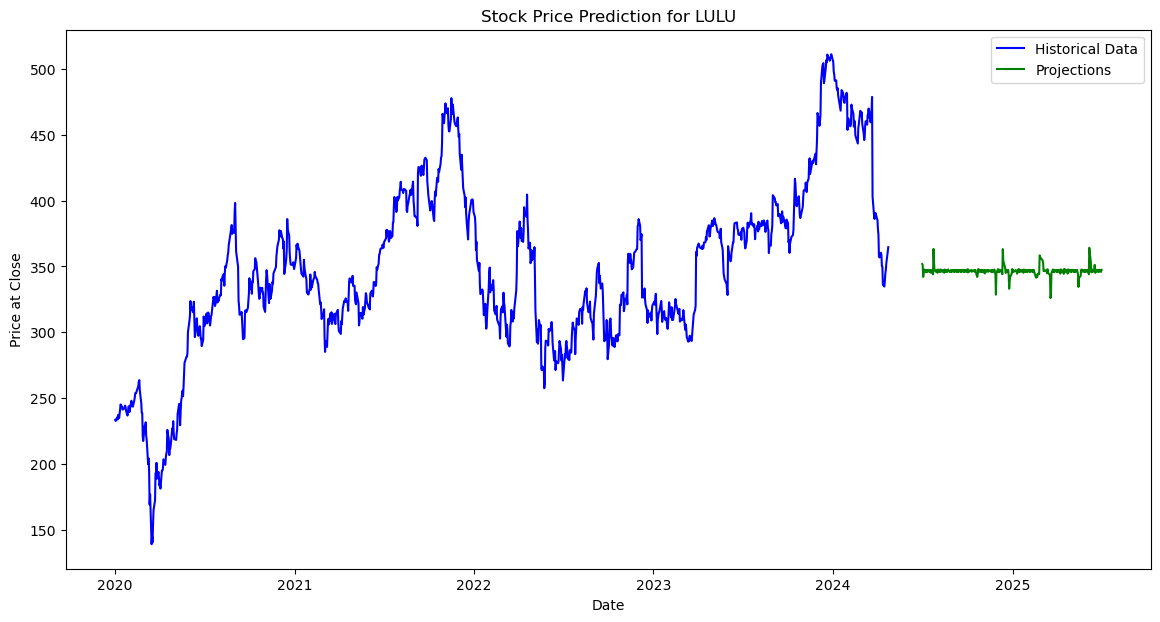

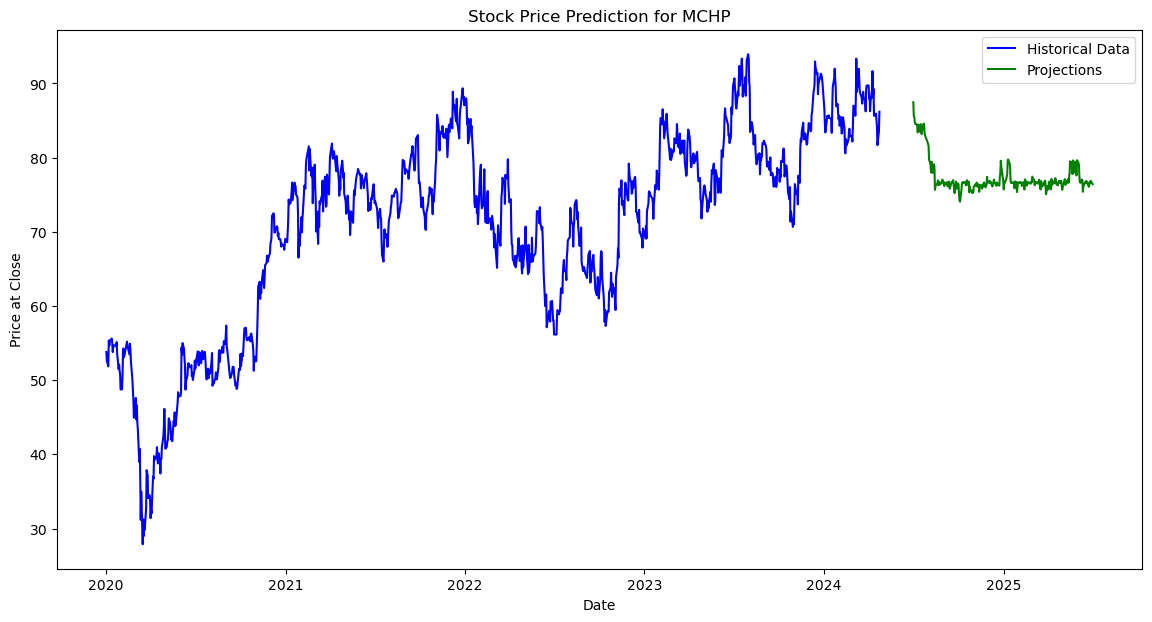

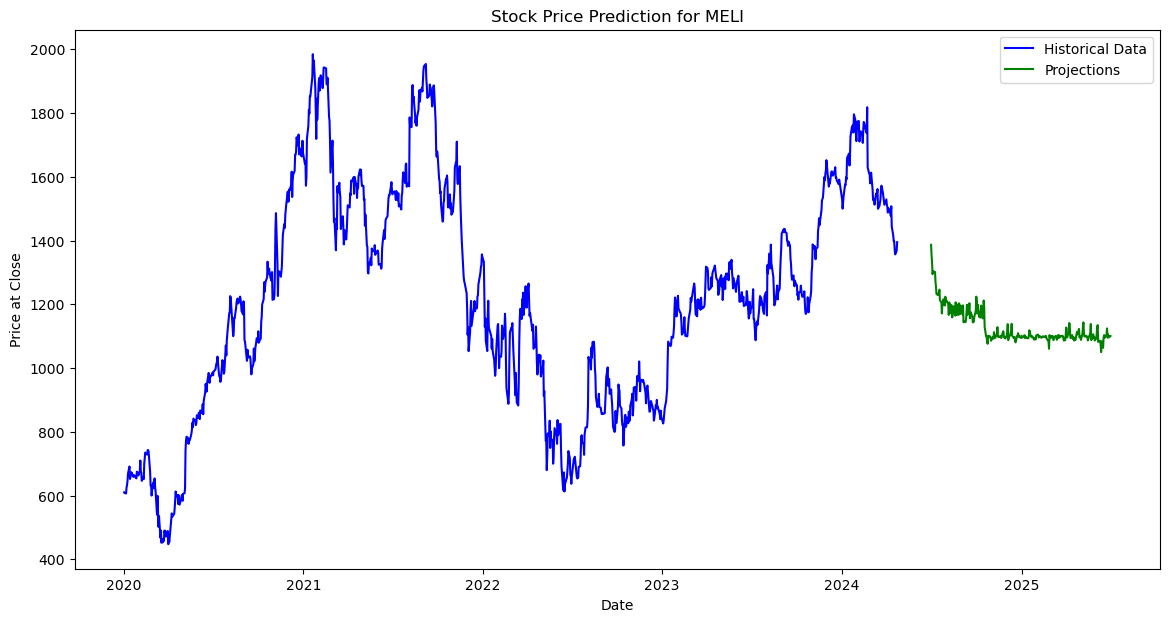

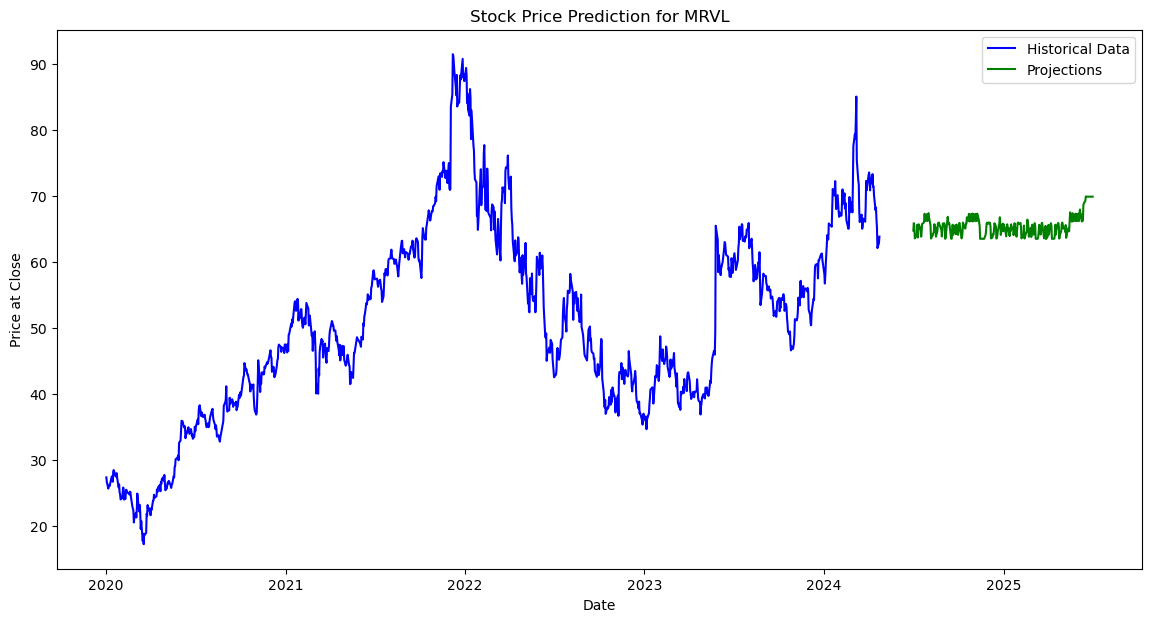

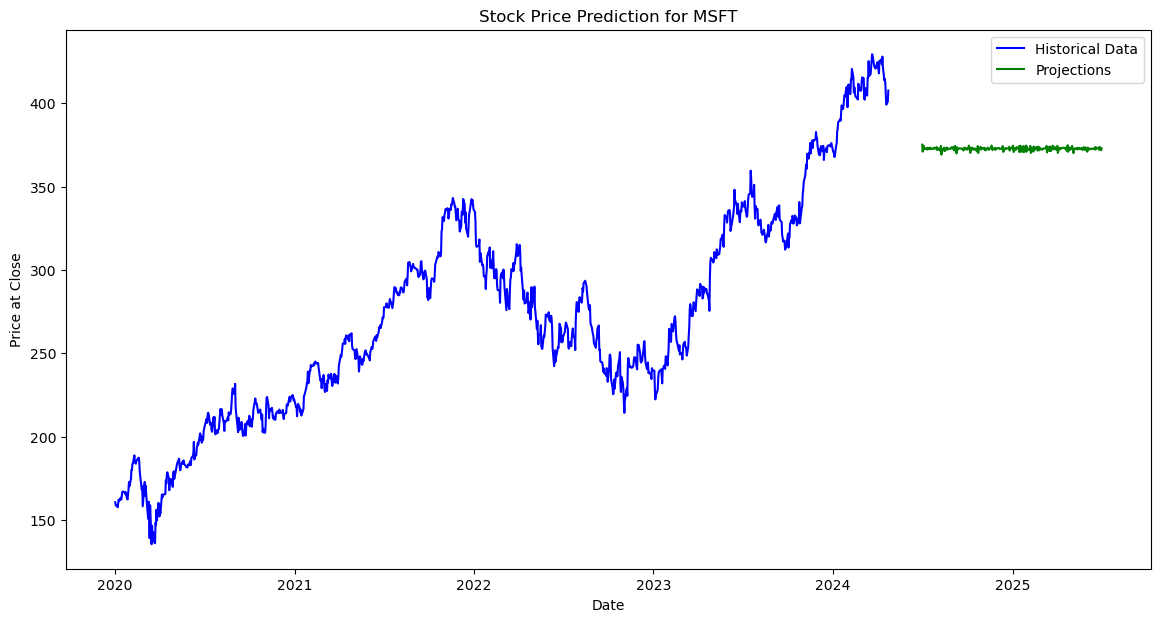

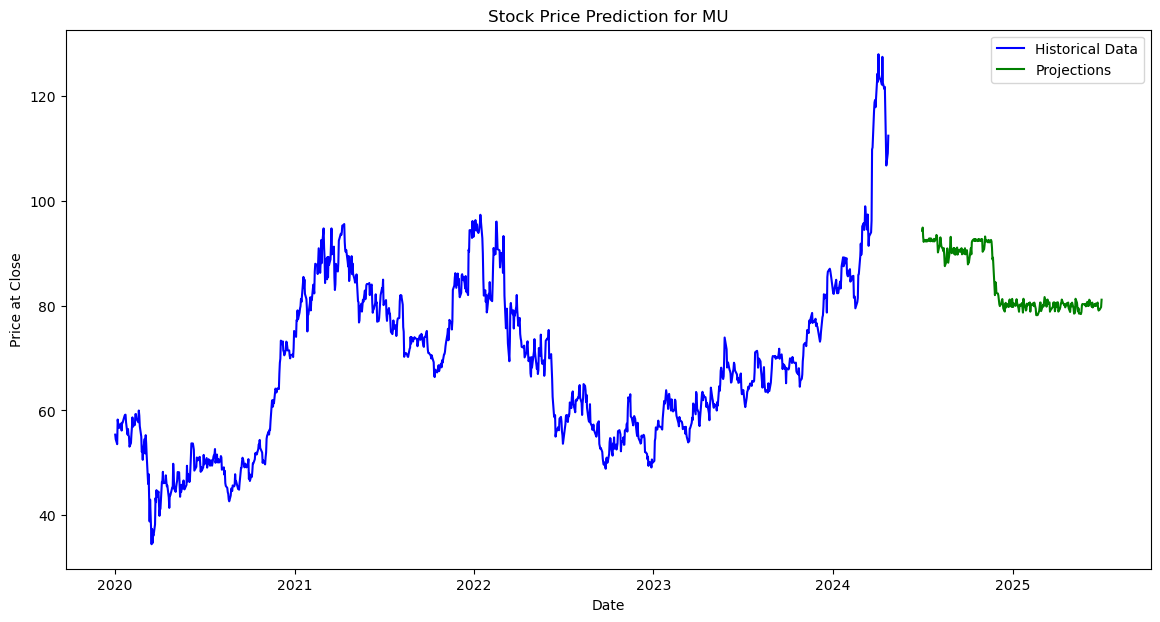

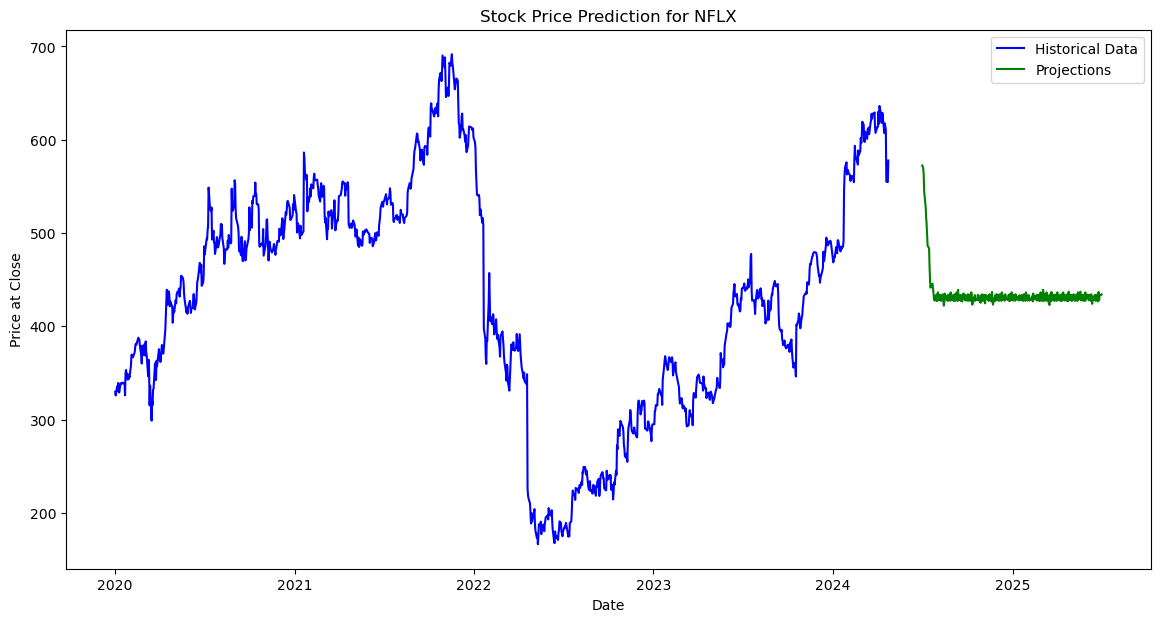

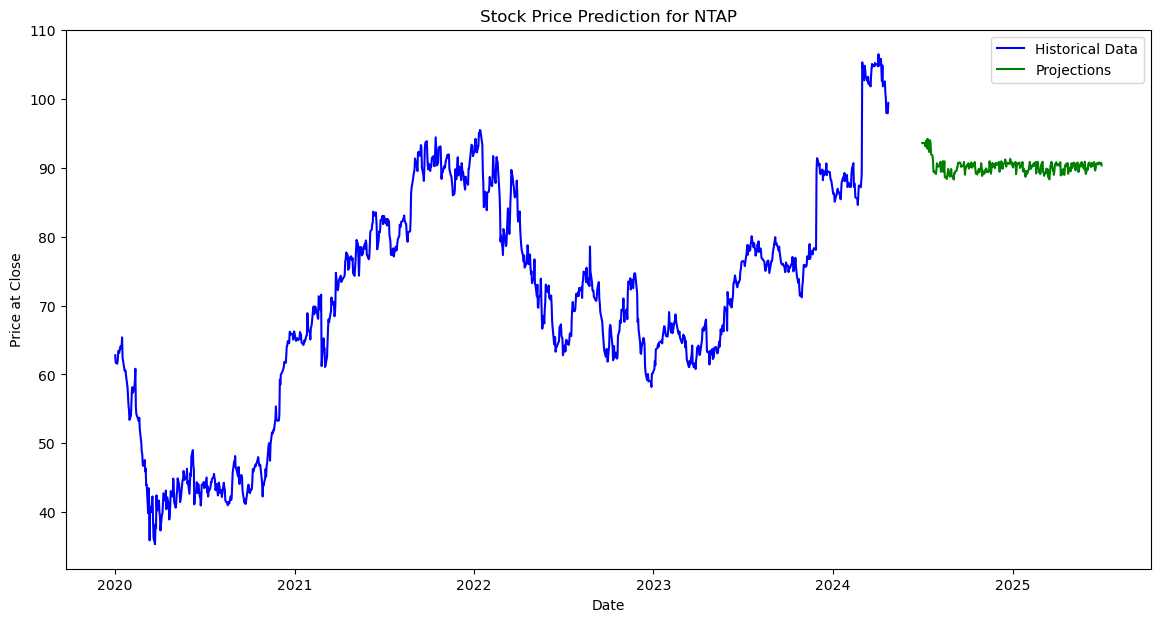

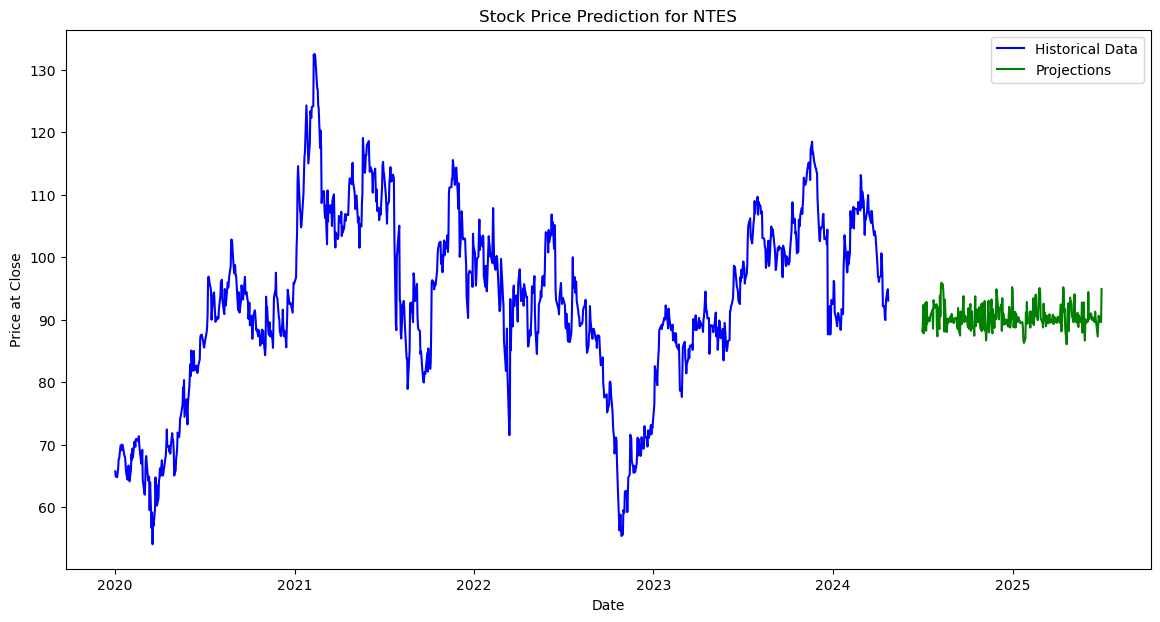

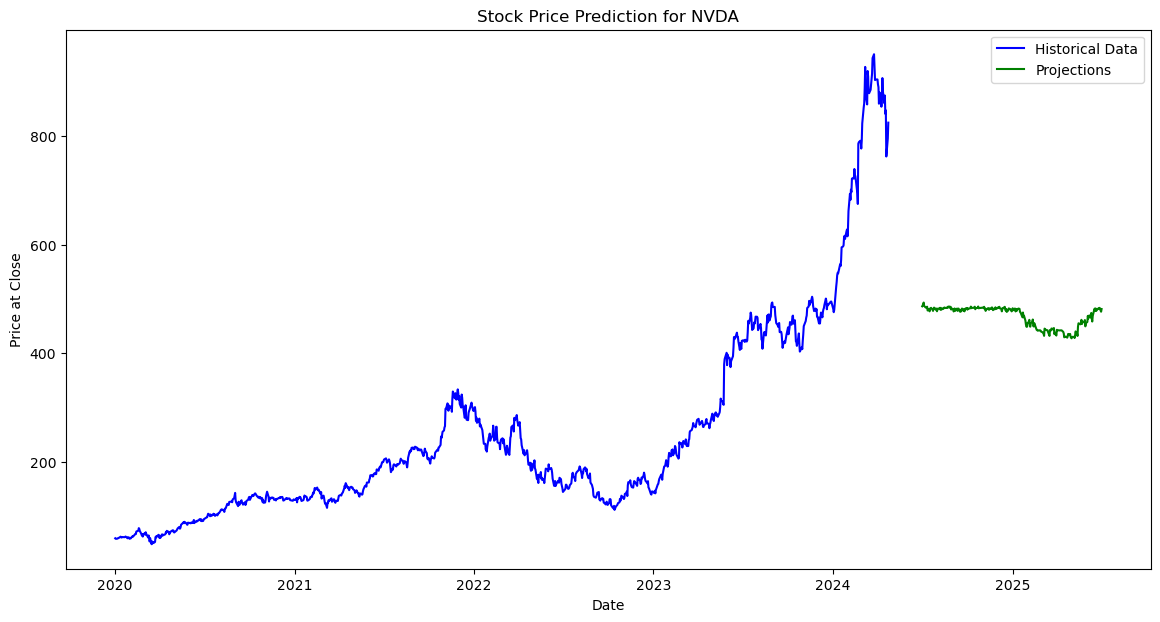

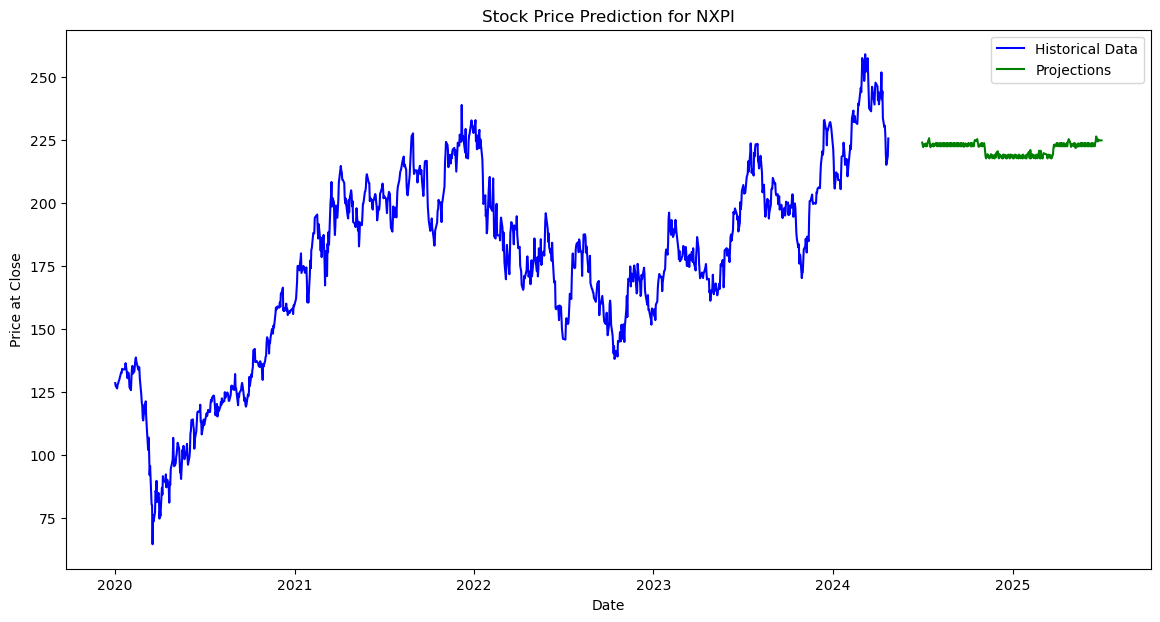

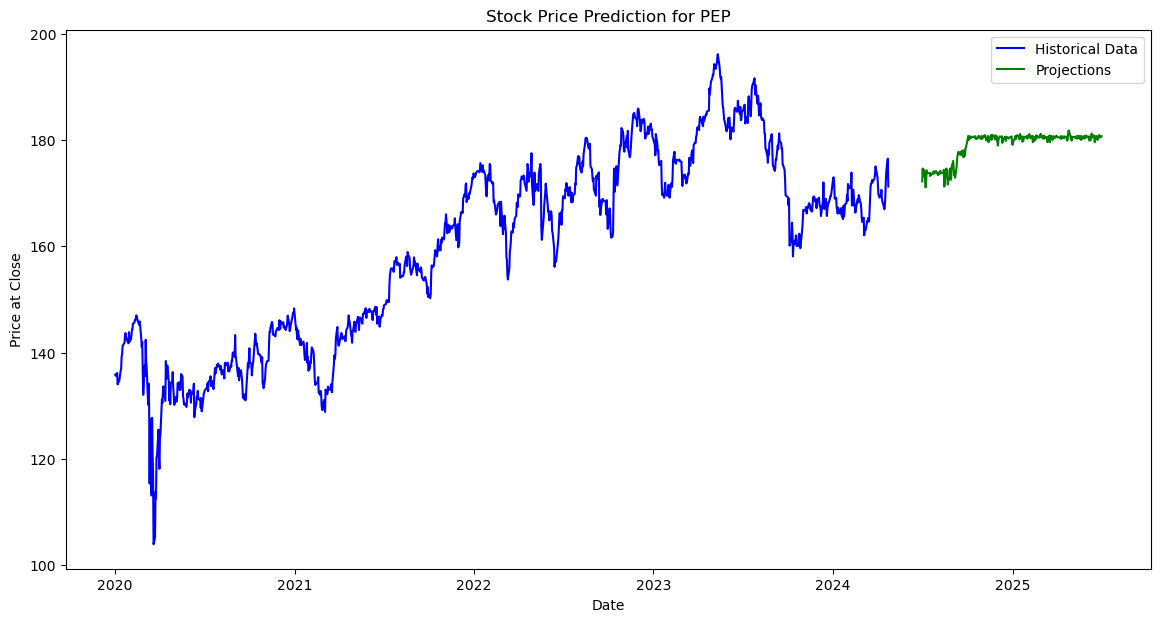

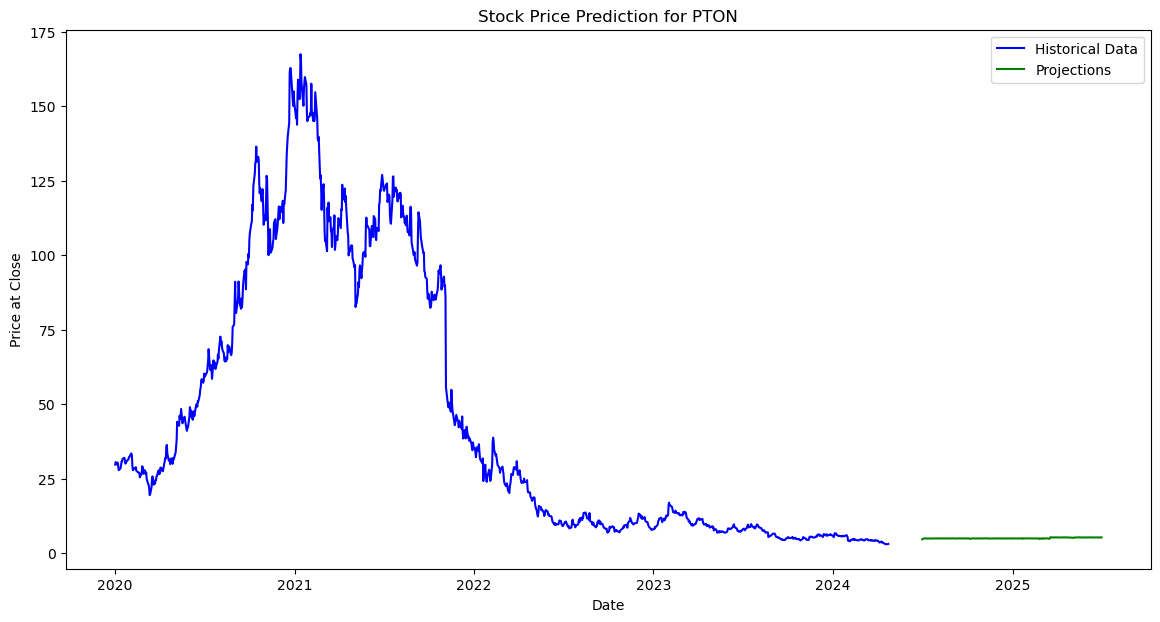

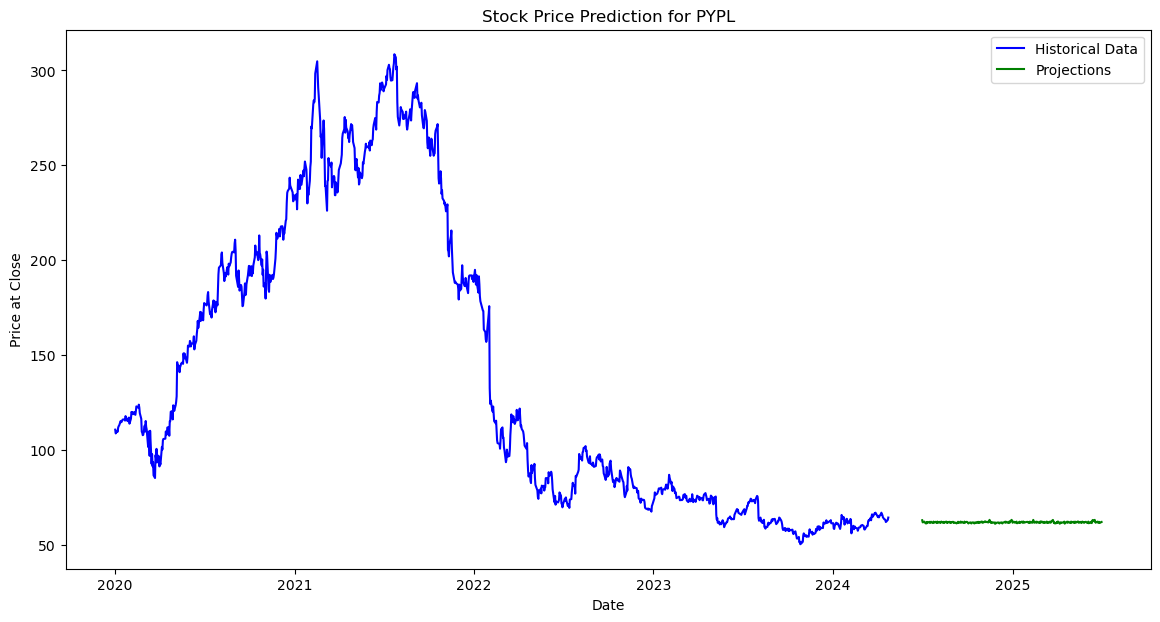

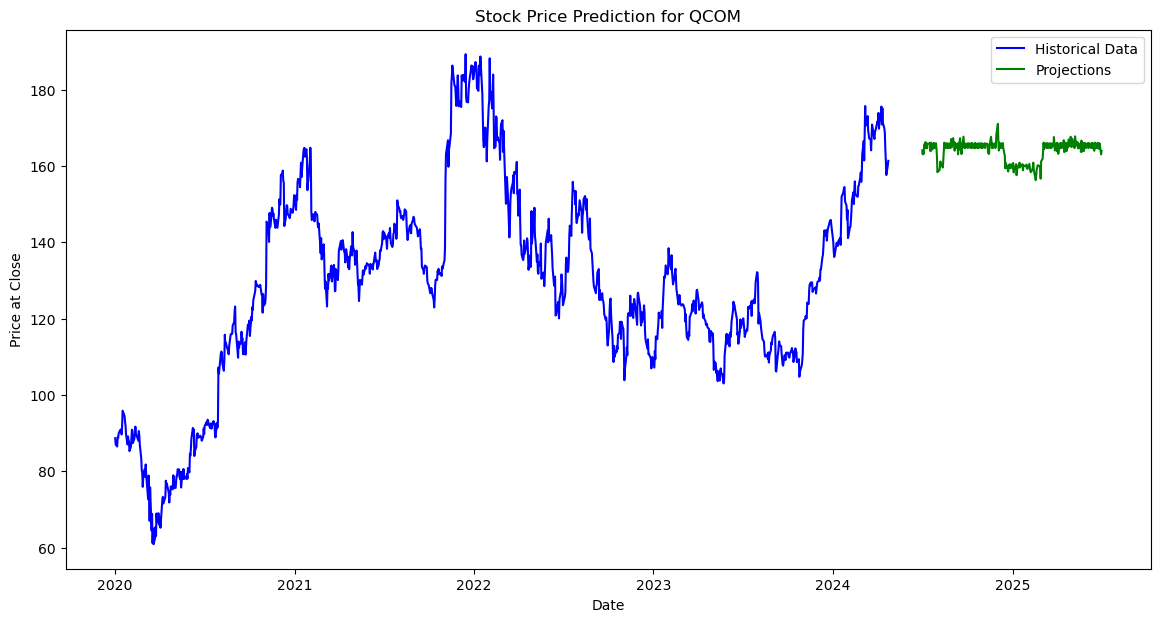

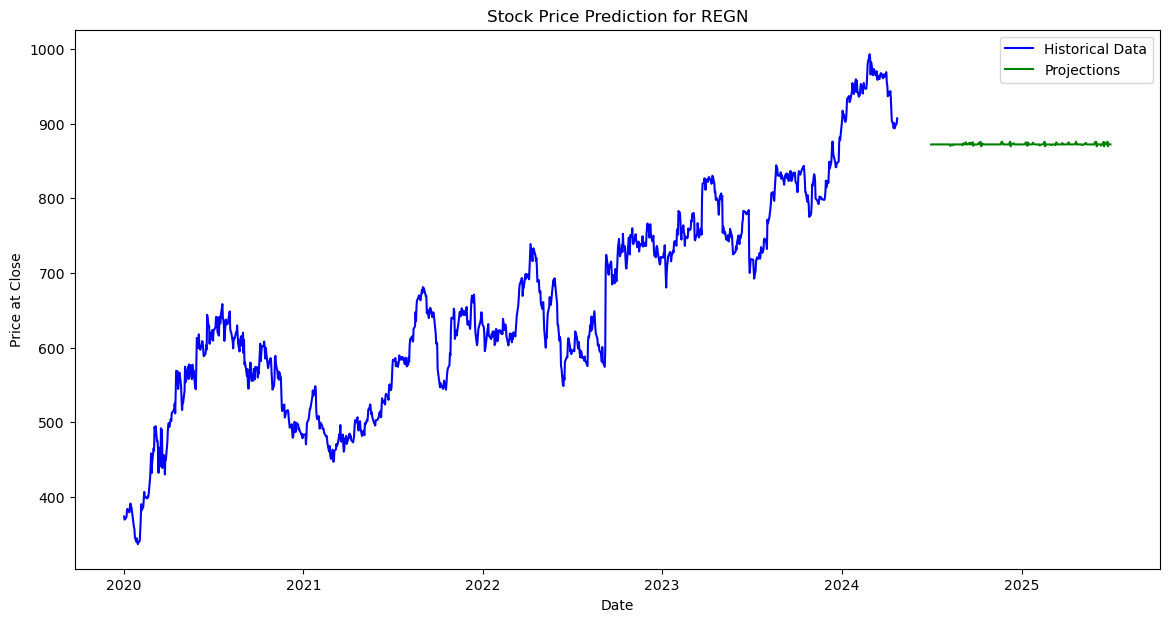

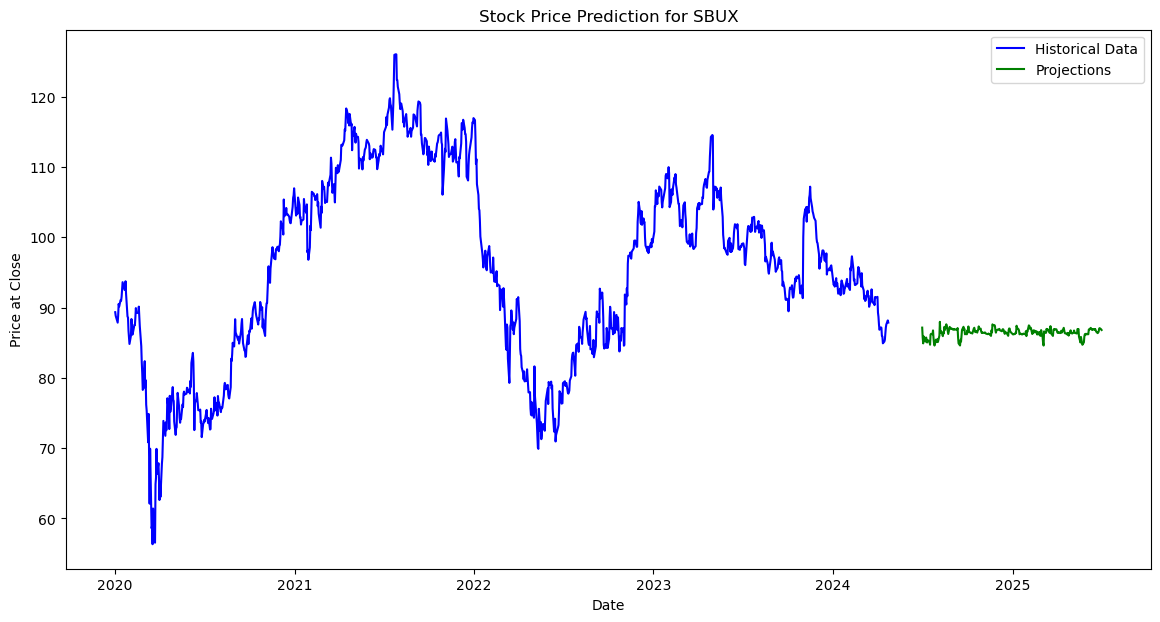

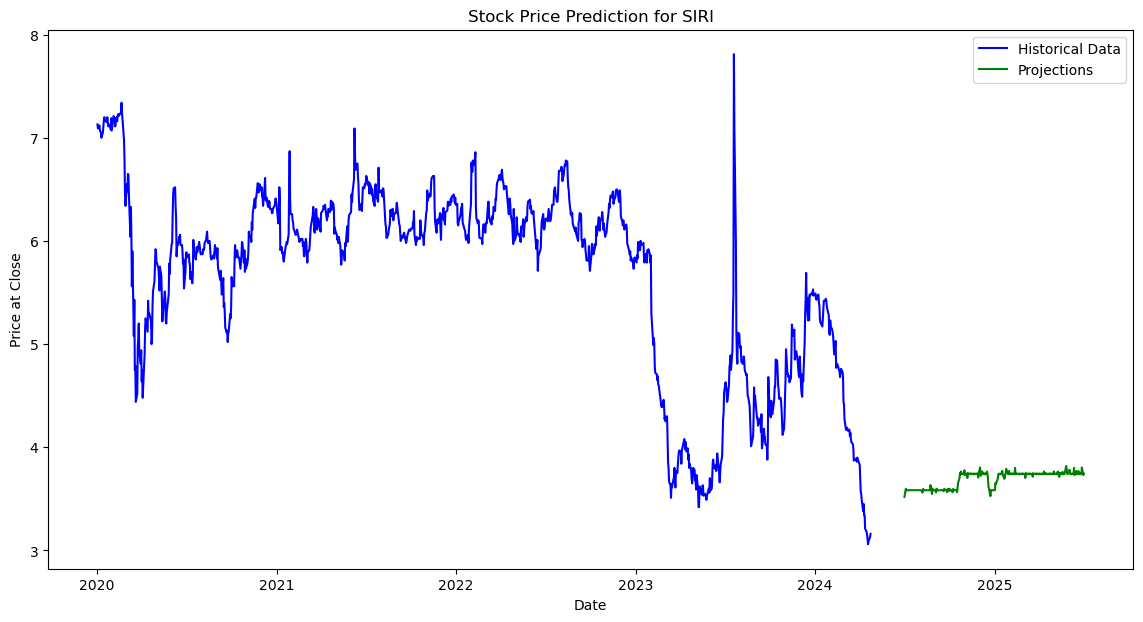

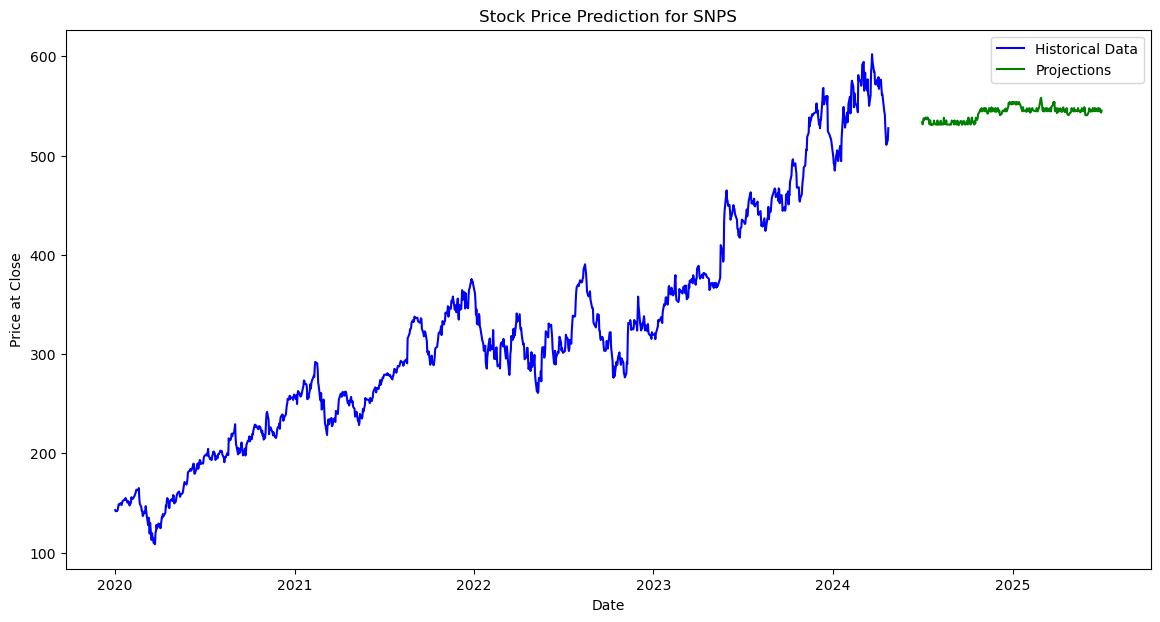

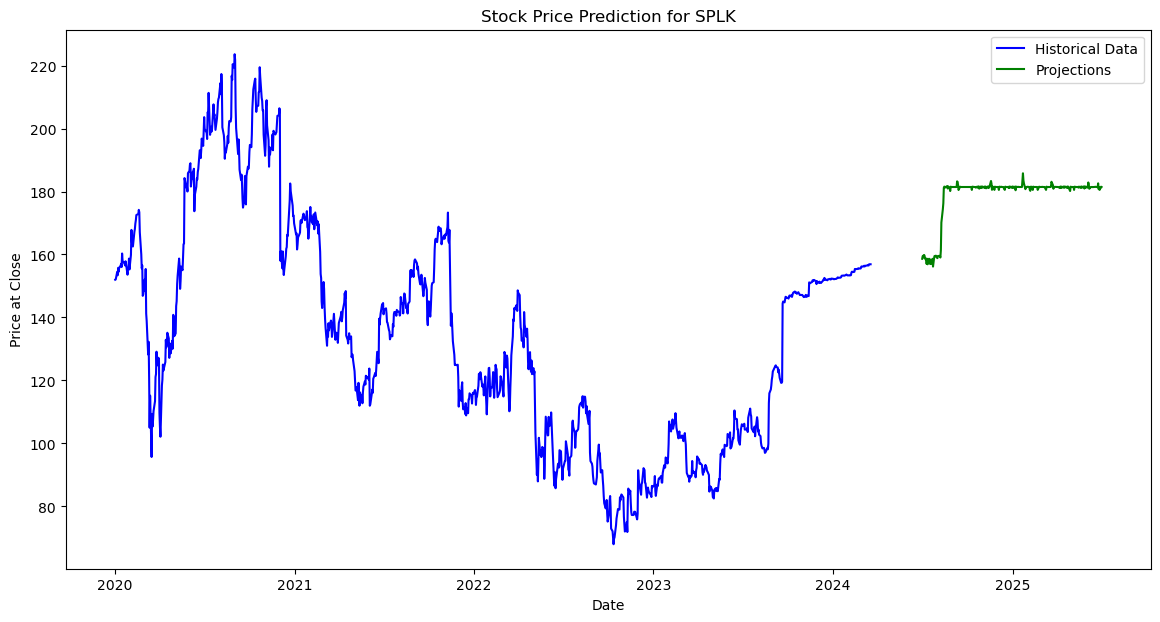

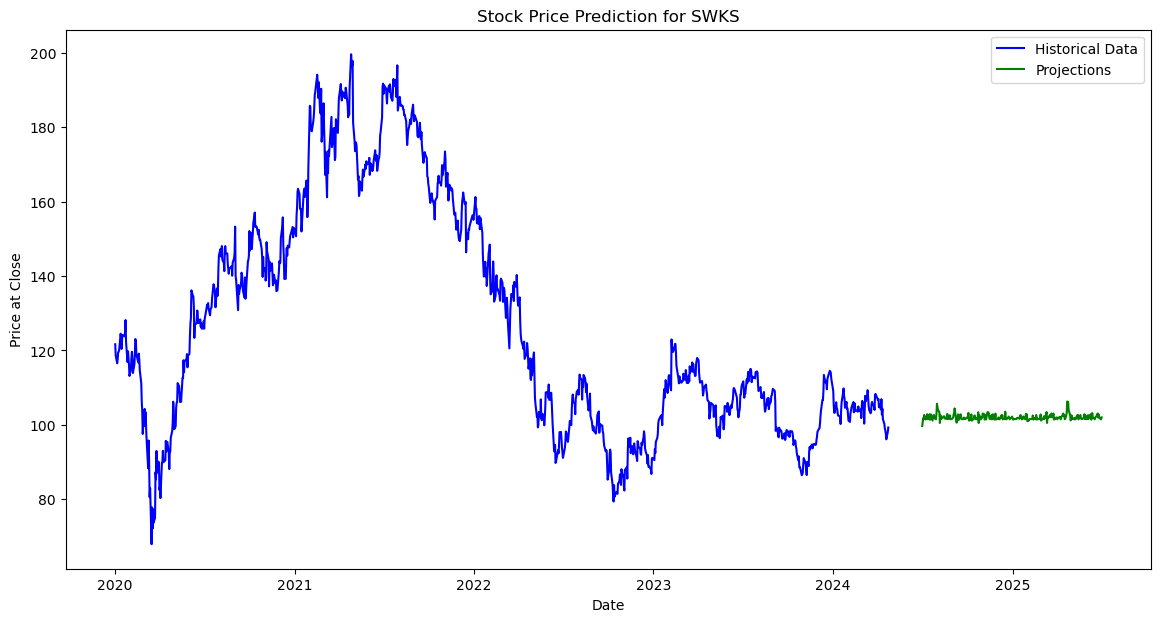

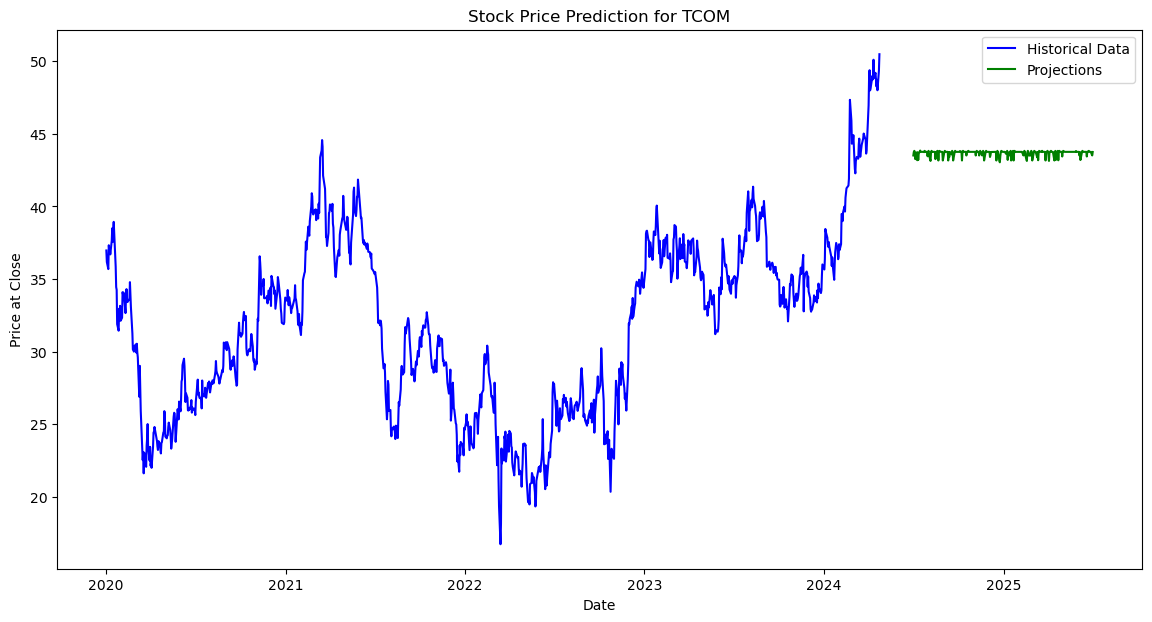

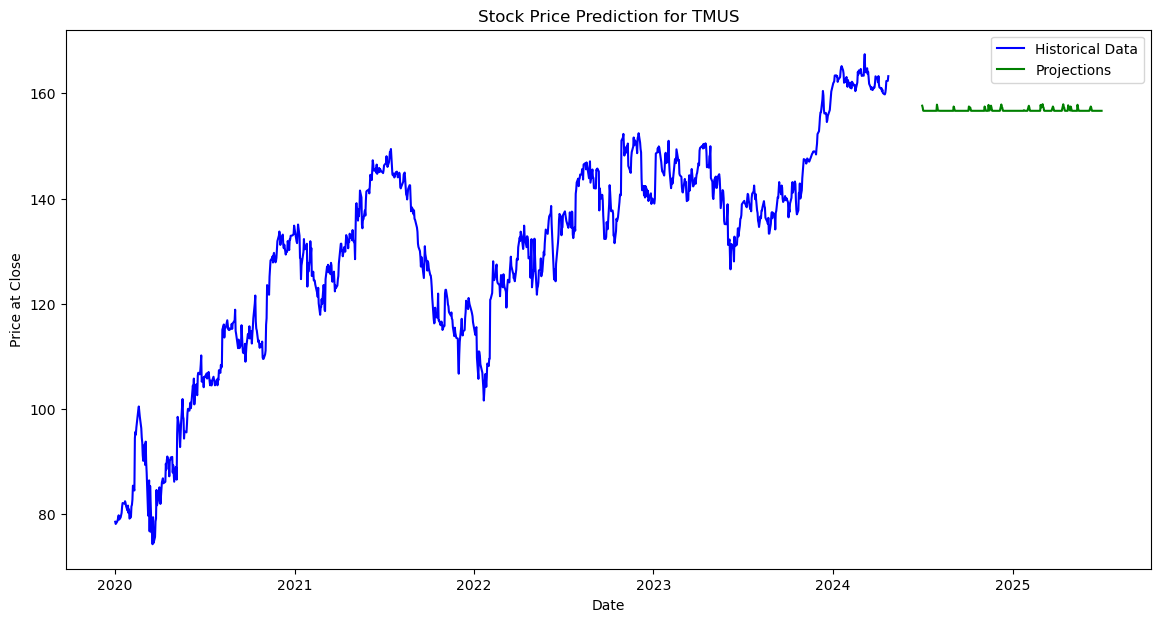

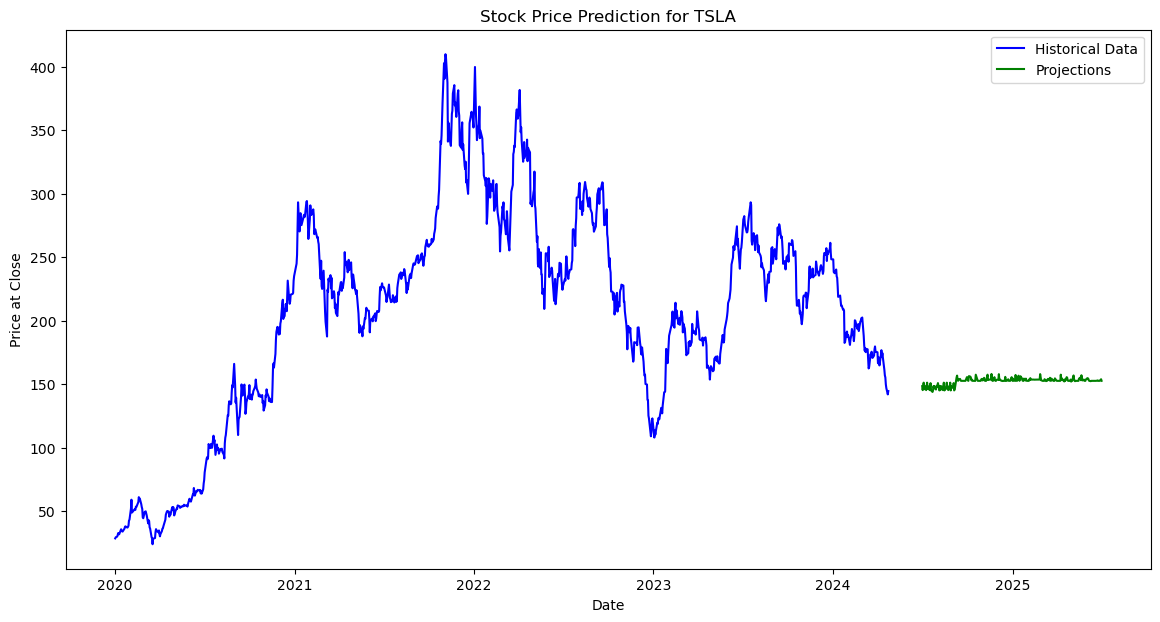

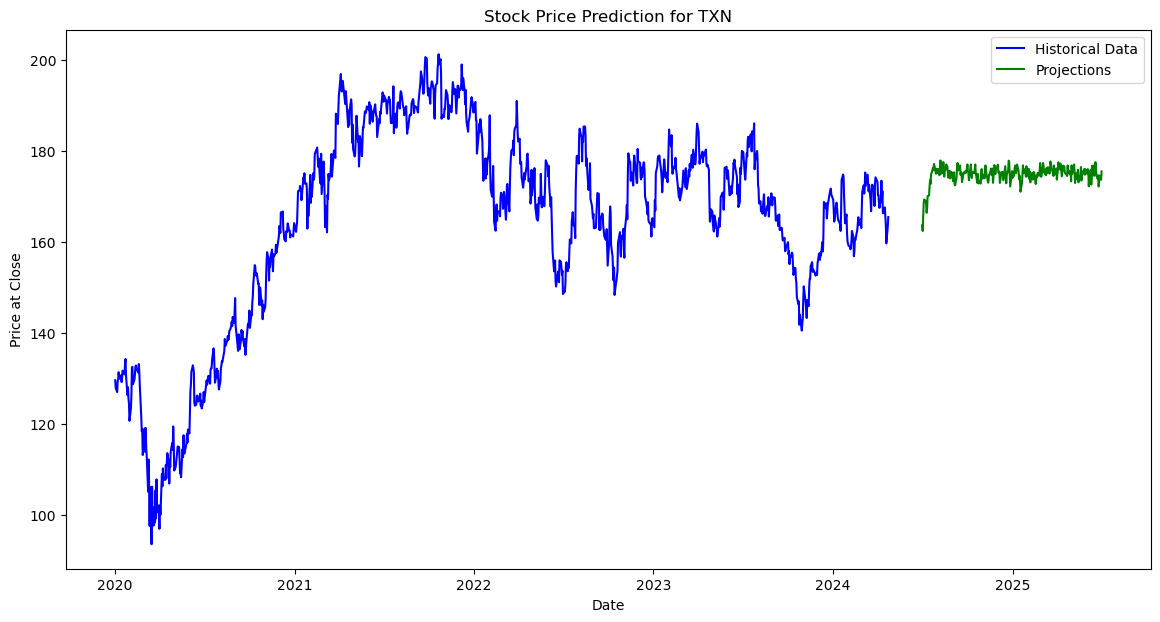

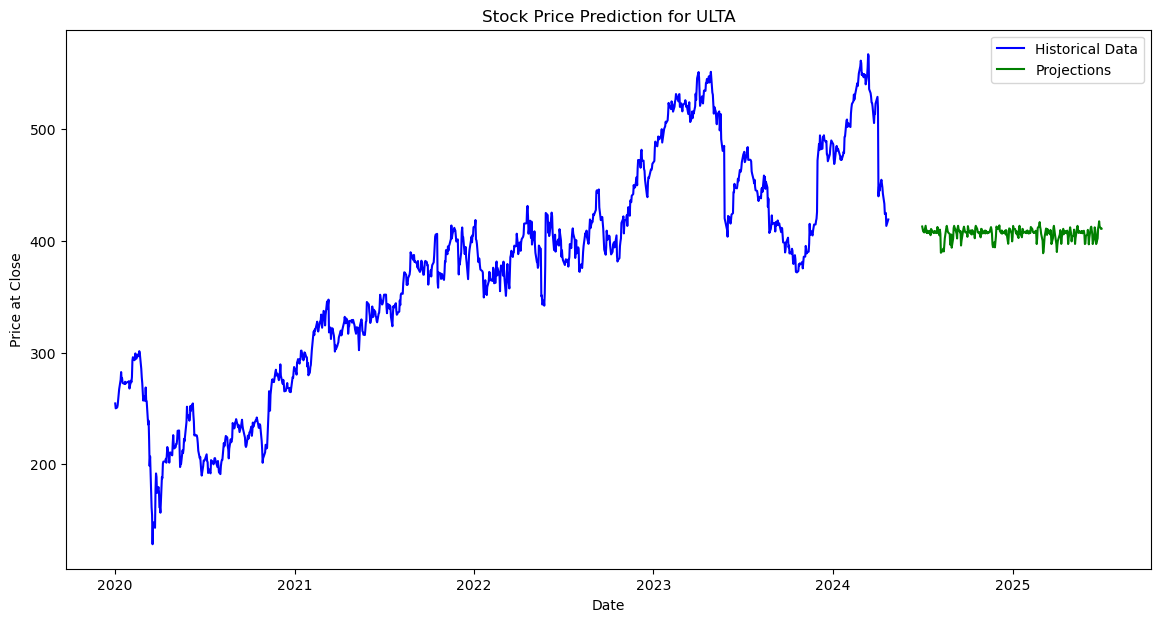

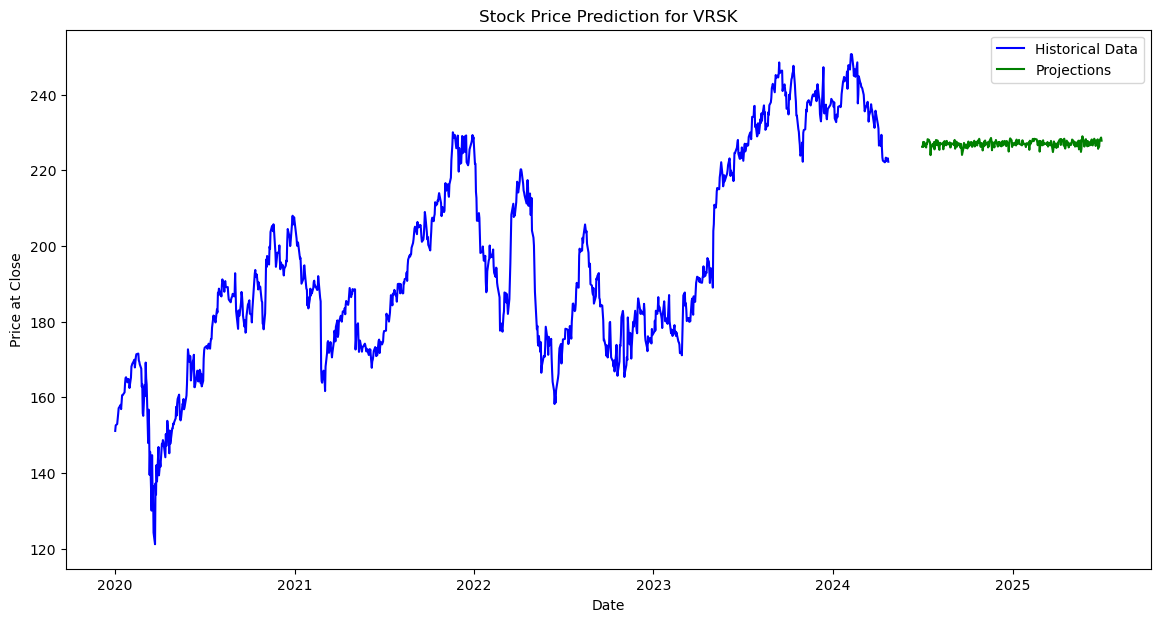

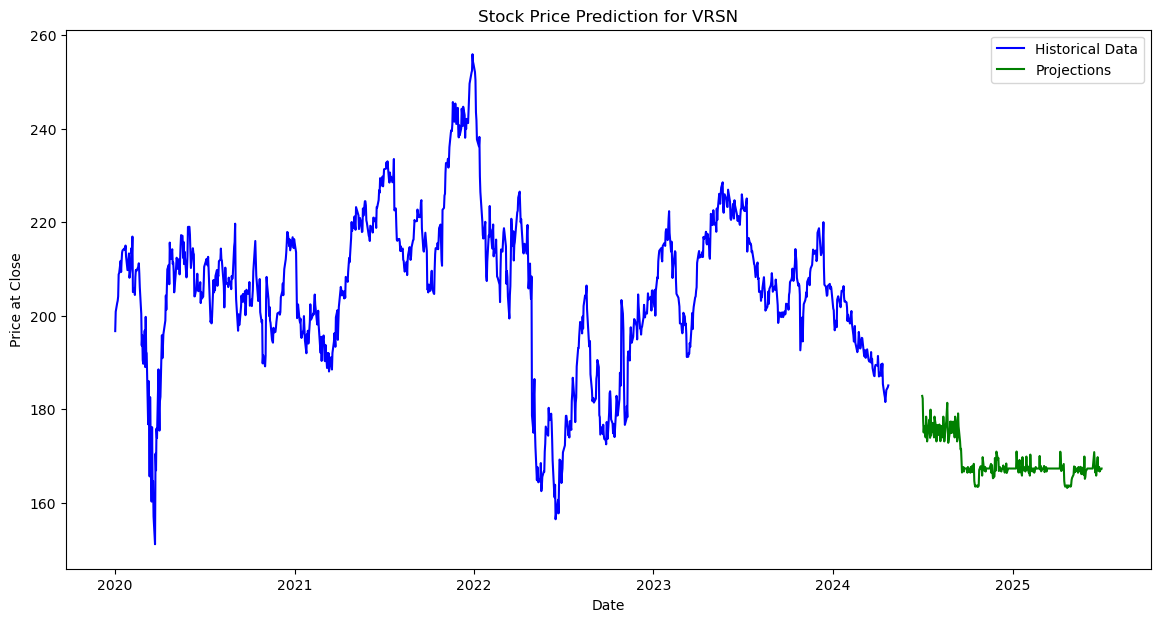

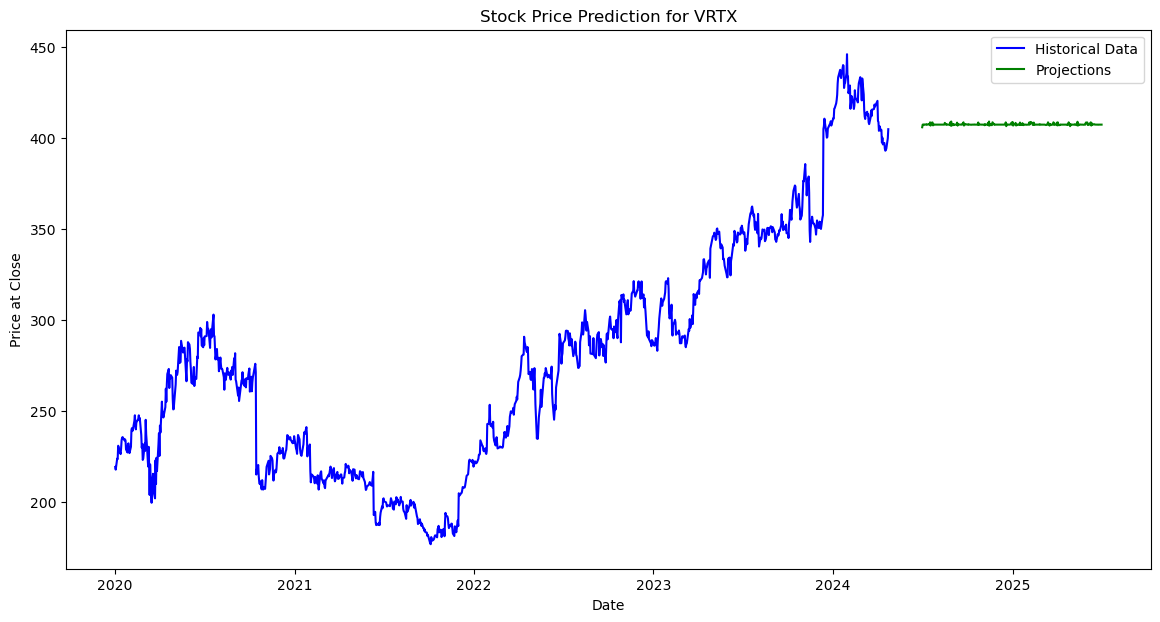

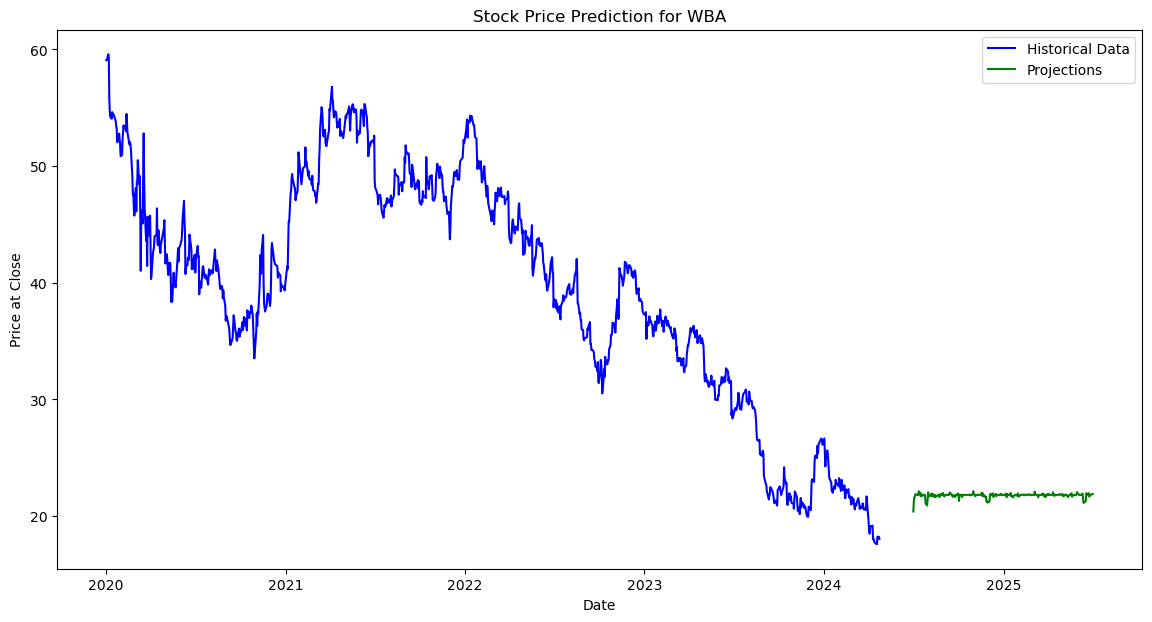

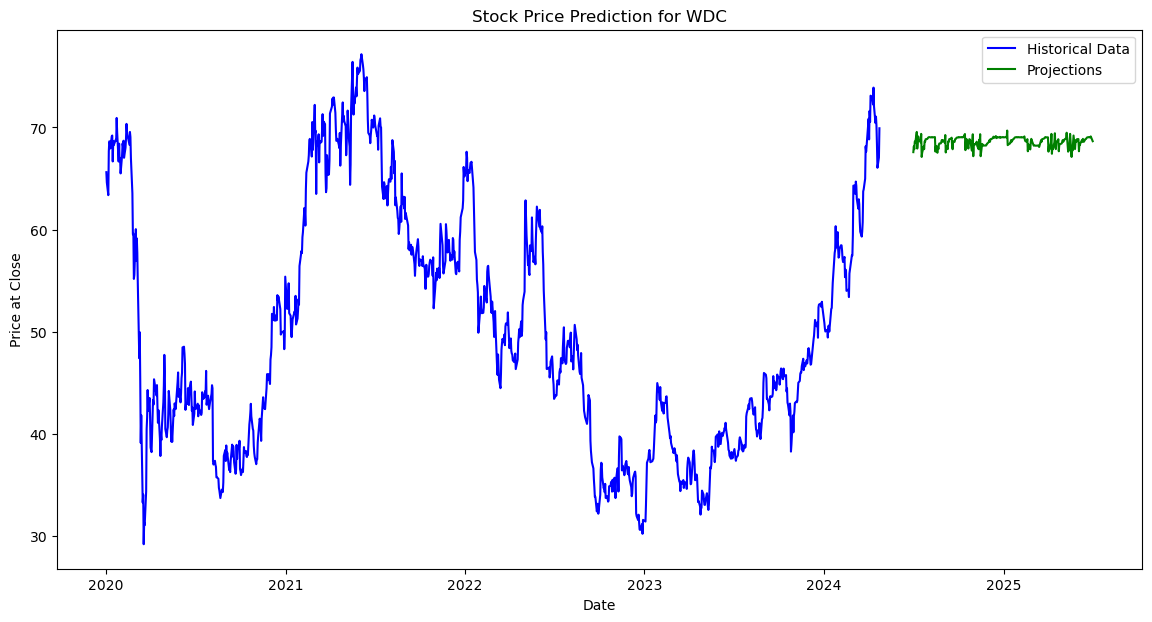

In [4]:
#Generate a list of stock names
stock_names = stock_predictions_df['Stock'].unique()

# Create a for loop to iterate over all stocks
for stock_name in stock_names:
    plot_stock(stock_name, data_path, grouped_predictions_df, visualization_path)